In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import *

# Data cleaning- Johns Hopkins dataset 
first, reading in the latest US reported daily report (4/16)

In [7]:
df = pd.read_csv("../csse_covid_19_data/csse_covid_19_daily_reports_us/04-21-2020.csv")
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-21 23:40:34,32.3182,-86.9023,5317,183,NaN,5134.0,1.0,113.395538,48526.0,699.0,3.441790,84000001,USA,1034.912902,13.146511
1,Alaska,US,2020-04-21 23:40:34,61.3707,-152.4044,329,9,168.0,320.0,2.0,55.039824,11119.0,42.0,2.735562,84000002,USA,1860.145312,12.765957
2,American Samoa,US,2020-04-21 23:40:34,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-21 23:40:34,33.7298,-111.4312,5256,208,1155.0,5048.0,4.0,72.210528,55152.0,637.0,3.957382,84000004,USA,757.715955,12.119482
4,Arkansas,US,2020-04-21 23:40:34,34.9697,-92.3731,1990,42,809.0,1948.0,5.0,76.862852,27441.0,291.0,2.110553,84000005,USA,1059.896247,14.623116


This is the Johns Hopkins dataset. It contains 18 variables. 
We don't need all the variables, taking out some irrelevent variables for this project.

In [8]:
df.set_index("Province_State", inplace = True)
df.drop(['Last_Update','Lat', "Long_", "FIPS", 'UID', 'ISO3', 'Recovered', 'People_Hospitalized', 'Hospitalization_Rate'], axis = 1, inplace = True)
df

,Country_Region,Confirmed,Deaths,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate
Province_State,,,,,,,,
Alabama,US,5317,183,5134.0,113.395538,48526.0,3.441790,1034.912902
Alaska,US,329,9,320.0,55.039824,11119.0,2.735562,1860.145312
American Samoa,US,0,0,NaN,0.000000,3.0,NaN,5.391708
Arizona,US,5256,208,5048.0,72.210528,55152.0,3.957382,757.715955
Arkansas,US,1990,42,1948.0,76.862852,27441.0,2.110553,1059.896247
California,US,35465,1282,34183.0,90.452049,300100.0,3.614832,765.392916
Colorado,US,10473,483,9990.0,184.812875,47466.0,4.611859,837.613664
Connecticut,US,20360,1423,18937.0,571.062021,64192.0,6.989194,1800.472164
Delaware,US,2931,82,2849.0,300.996956,16656.0,2.797680,1710.476050


In [9]:
# for dataframe information is calculated by column
print("dataframe shape:")
display(df.shape)  #59 regions, 8 variables
display(df.info())
df.mean()

dataframe shape:


(59, 8)

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, Alabama to Recovered
Data columns (total 8 columns):
Country_Region    59 non-null object
Confirmed         59 non-null int64
Deaths            59 non-null int64
Active            58 non-null float64
Incident_Rate     56 non-null float64
People_Tested     56 non-null float64
Mortality_Rate    57 non-null float64
Testing_Rate      56 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 4.1+ KB


None

Confirmed         13760.423729
Deaths              753.288136
Active            11934.775862
Incident_Rate       199.782731
People_Tested     74199.607143
Mortality_Rate        3.899292
Testing_Rate       1395.232927
dtype: float64

In [10]:
#dropping the cruises- Diamond Princess and Grand Princess, because they cannot be taken account into social distancing modeling 
#also dropping american samoa, too many NaNs
df.drop(["American Samoa", "Diamond Princess", "Grand Princess", "Recovered"], axis = 0, inplace = True)

In [11]:
display(df)

,Country_Region,Confirmed,Deaths,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate
Province_State,,,,,,,,
Alabama,US,5317,183,5134.0,113.395538,48526.0,3.441790,1034.912902
Alaska,US,329,9,320.0,55.039824,11119.0,2.735562,1860.145312
Arizona,US,5256,208,5048.0,72.210528,55152.0,3.957382,757.715955
Arkansas,US,1990,42,1948.0,76.862852,27441.0,2.110553,1059.896247
California,US,35465,1282,34183.0,90.452049,300100.0,3.614832,765.392916
Colorado,US,10473,483,9990.0,184.812875,47466.0,4.611859,837.613664
Connecticut,US,20360,1423,18937.0,571.062021,64192.0,6.989194,1800.472164
Delaware,US,2931,82,2849.0,300.996956,16656.0,2.797680,1710.476050
District of Columbia,US,3098,112,2986.0,438.966261,14939.0,3.615236,2116.758224


# Data Visualization
run some interesting and informative plots 

In [12]:
sns.set(color_codes=True, font_scale = 2.5, rc={'figure.figsize':(50,25)})

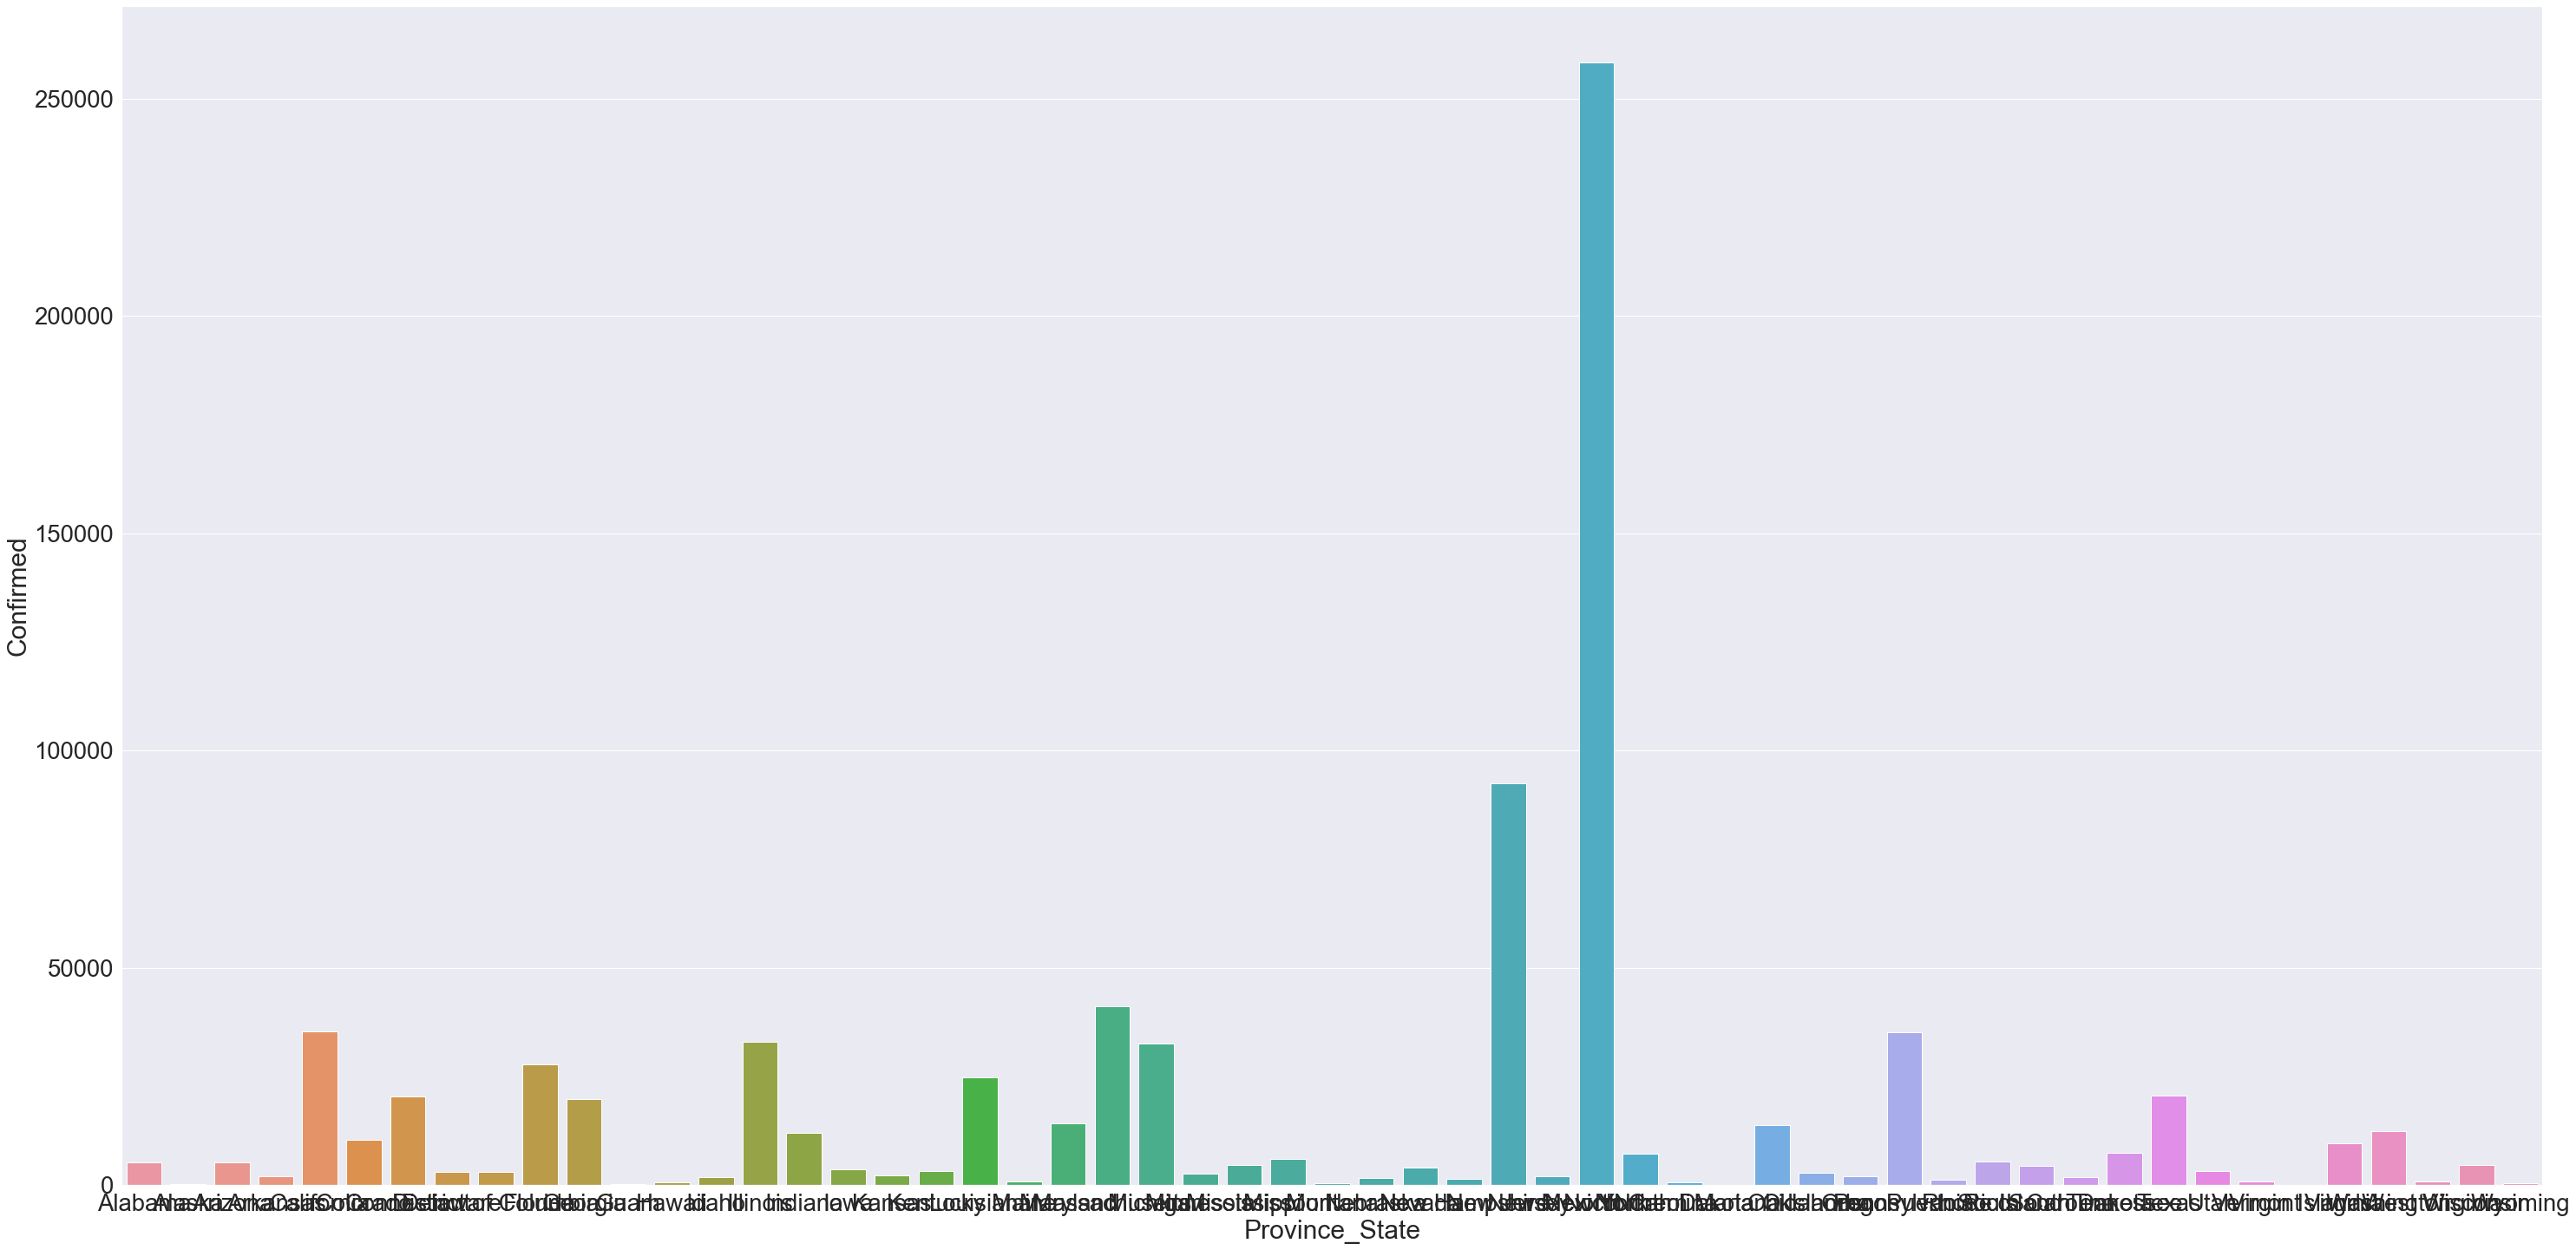

In [13]:
#all regions' accumulated confirmed cases 
sns.barplot(x = df.index, y = df.loc[:, "Confirmed"])  #too messy, break down regions into groups 

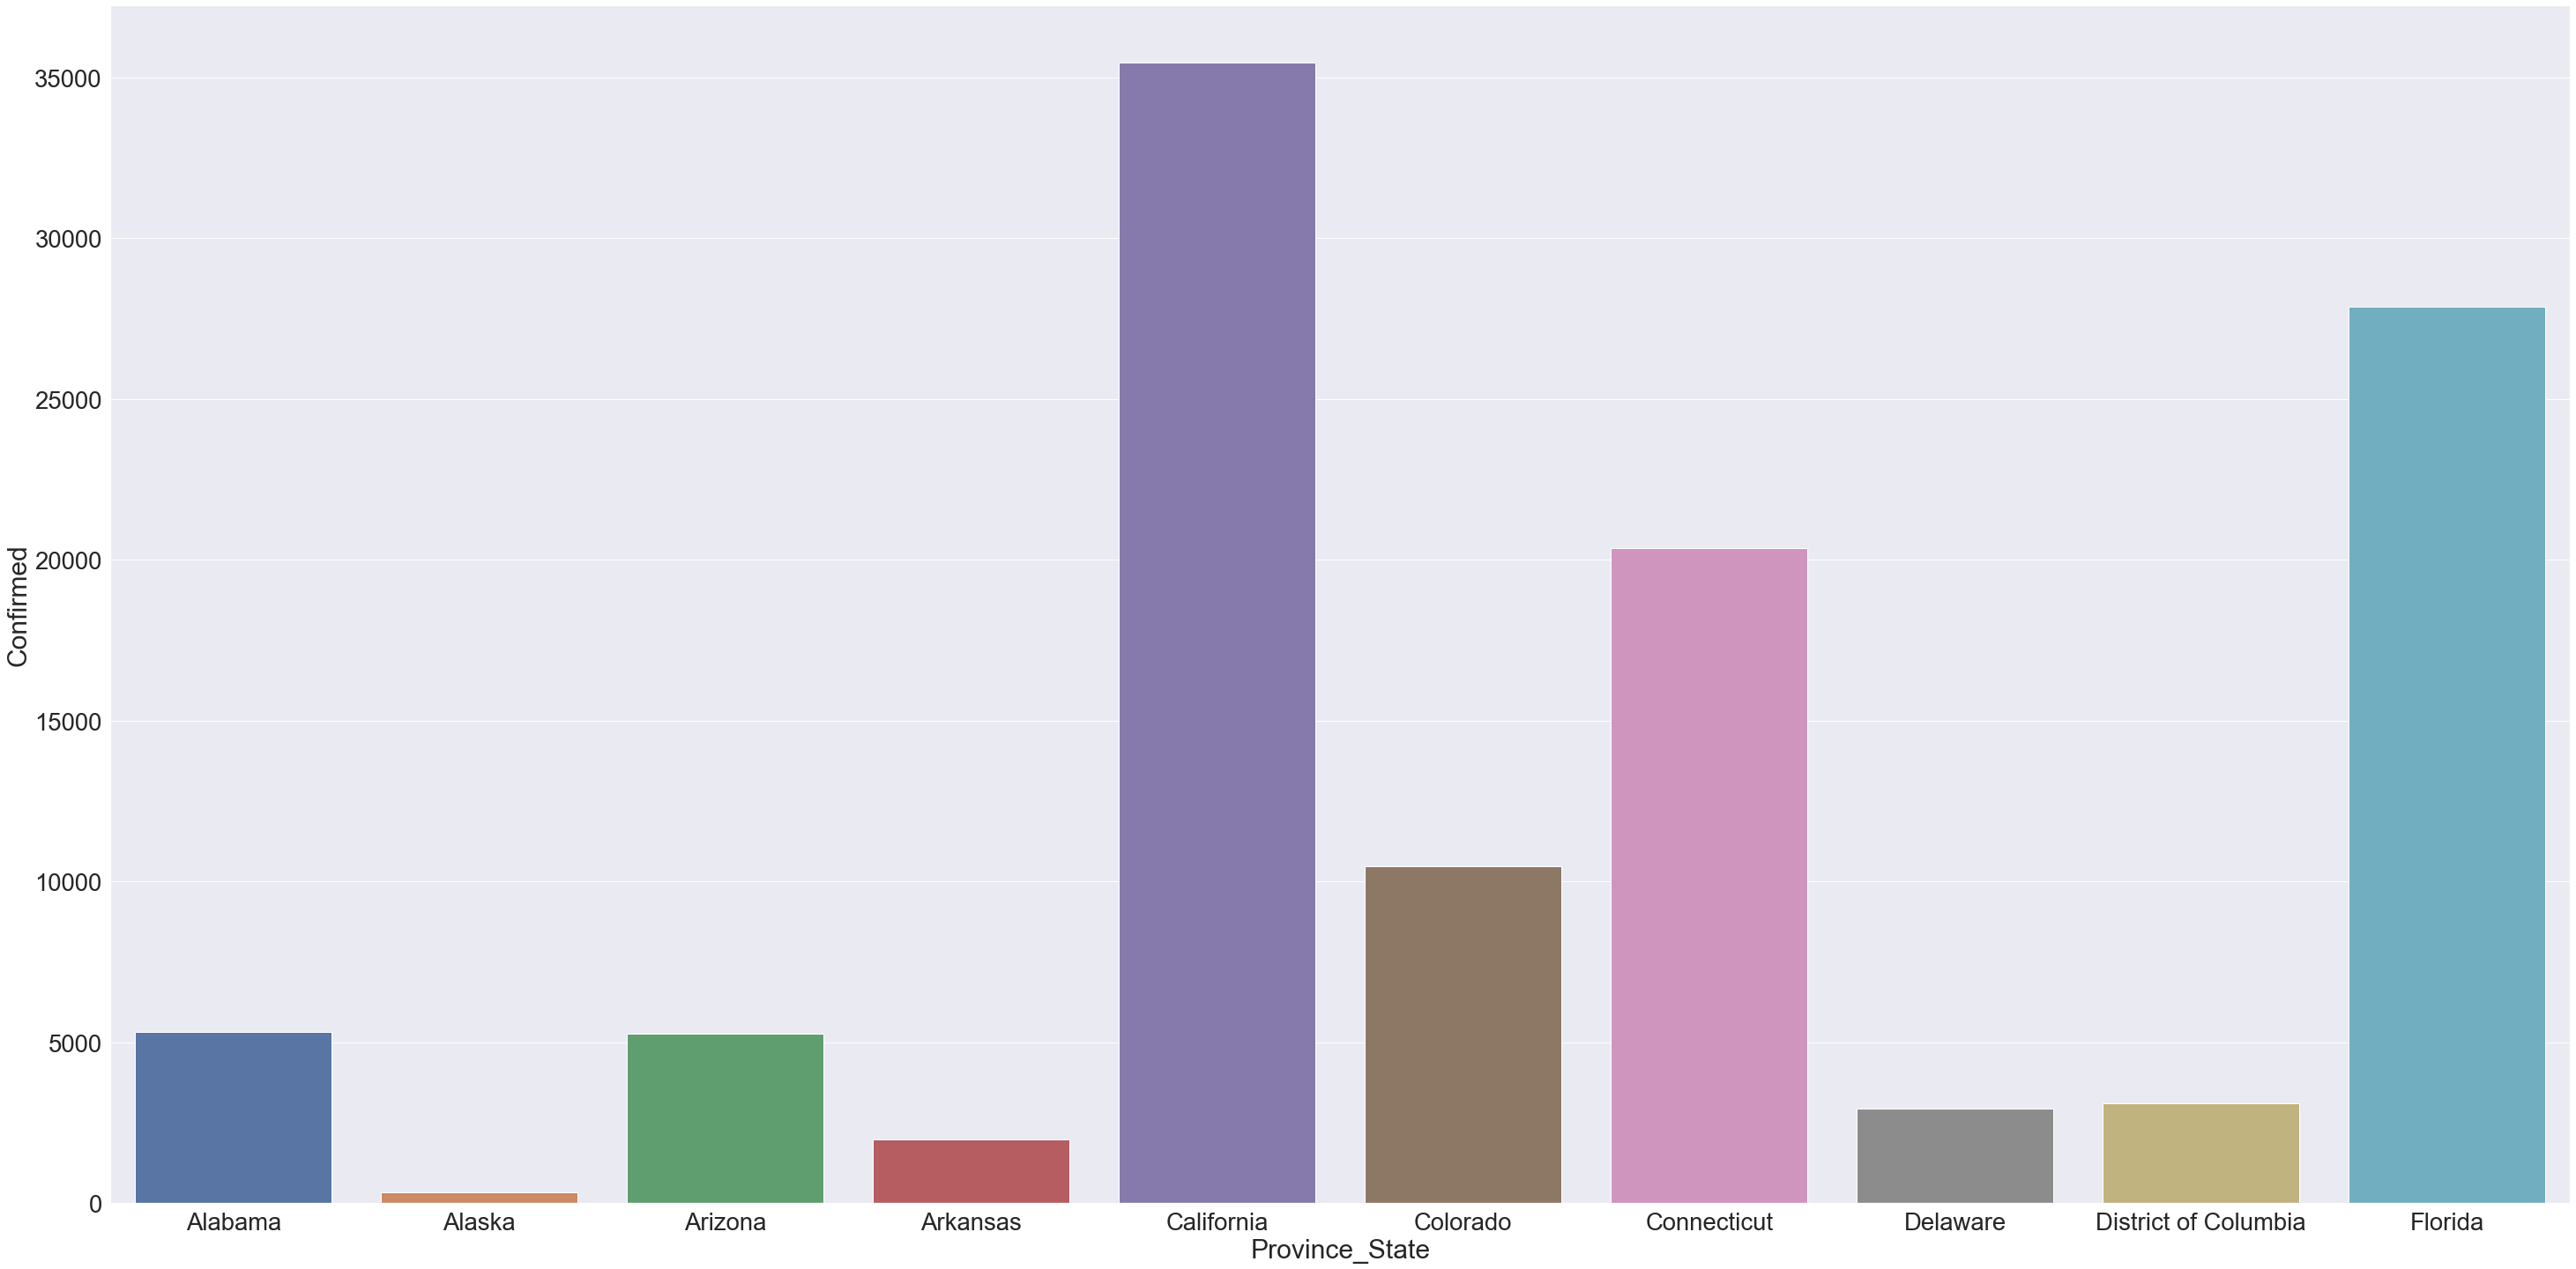

In [14]:
sns.barplot(x = df.index[0:10], y = df.loc["Alabama": "Florida", "Confirmed"])

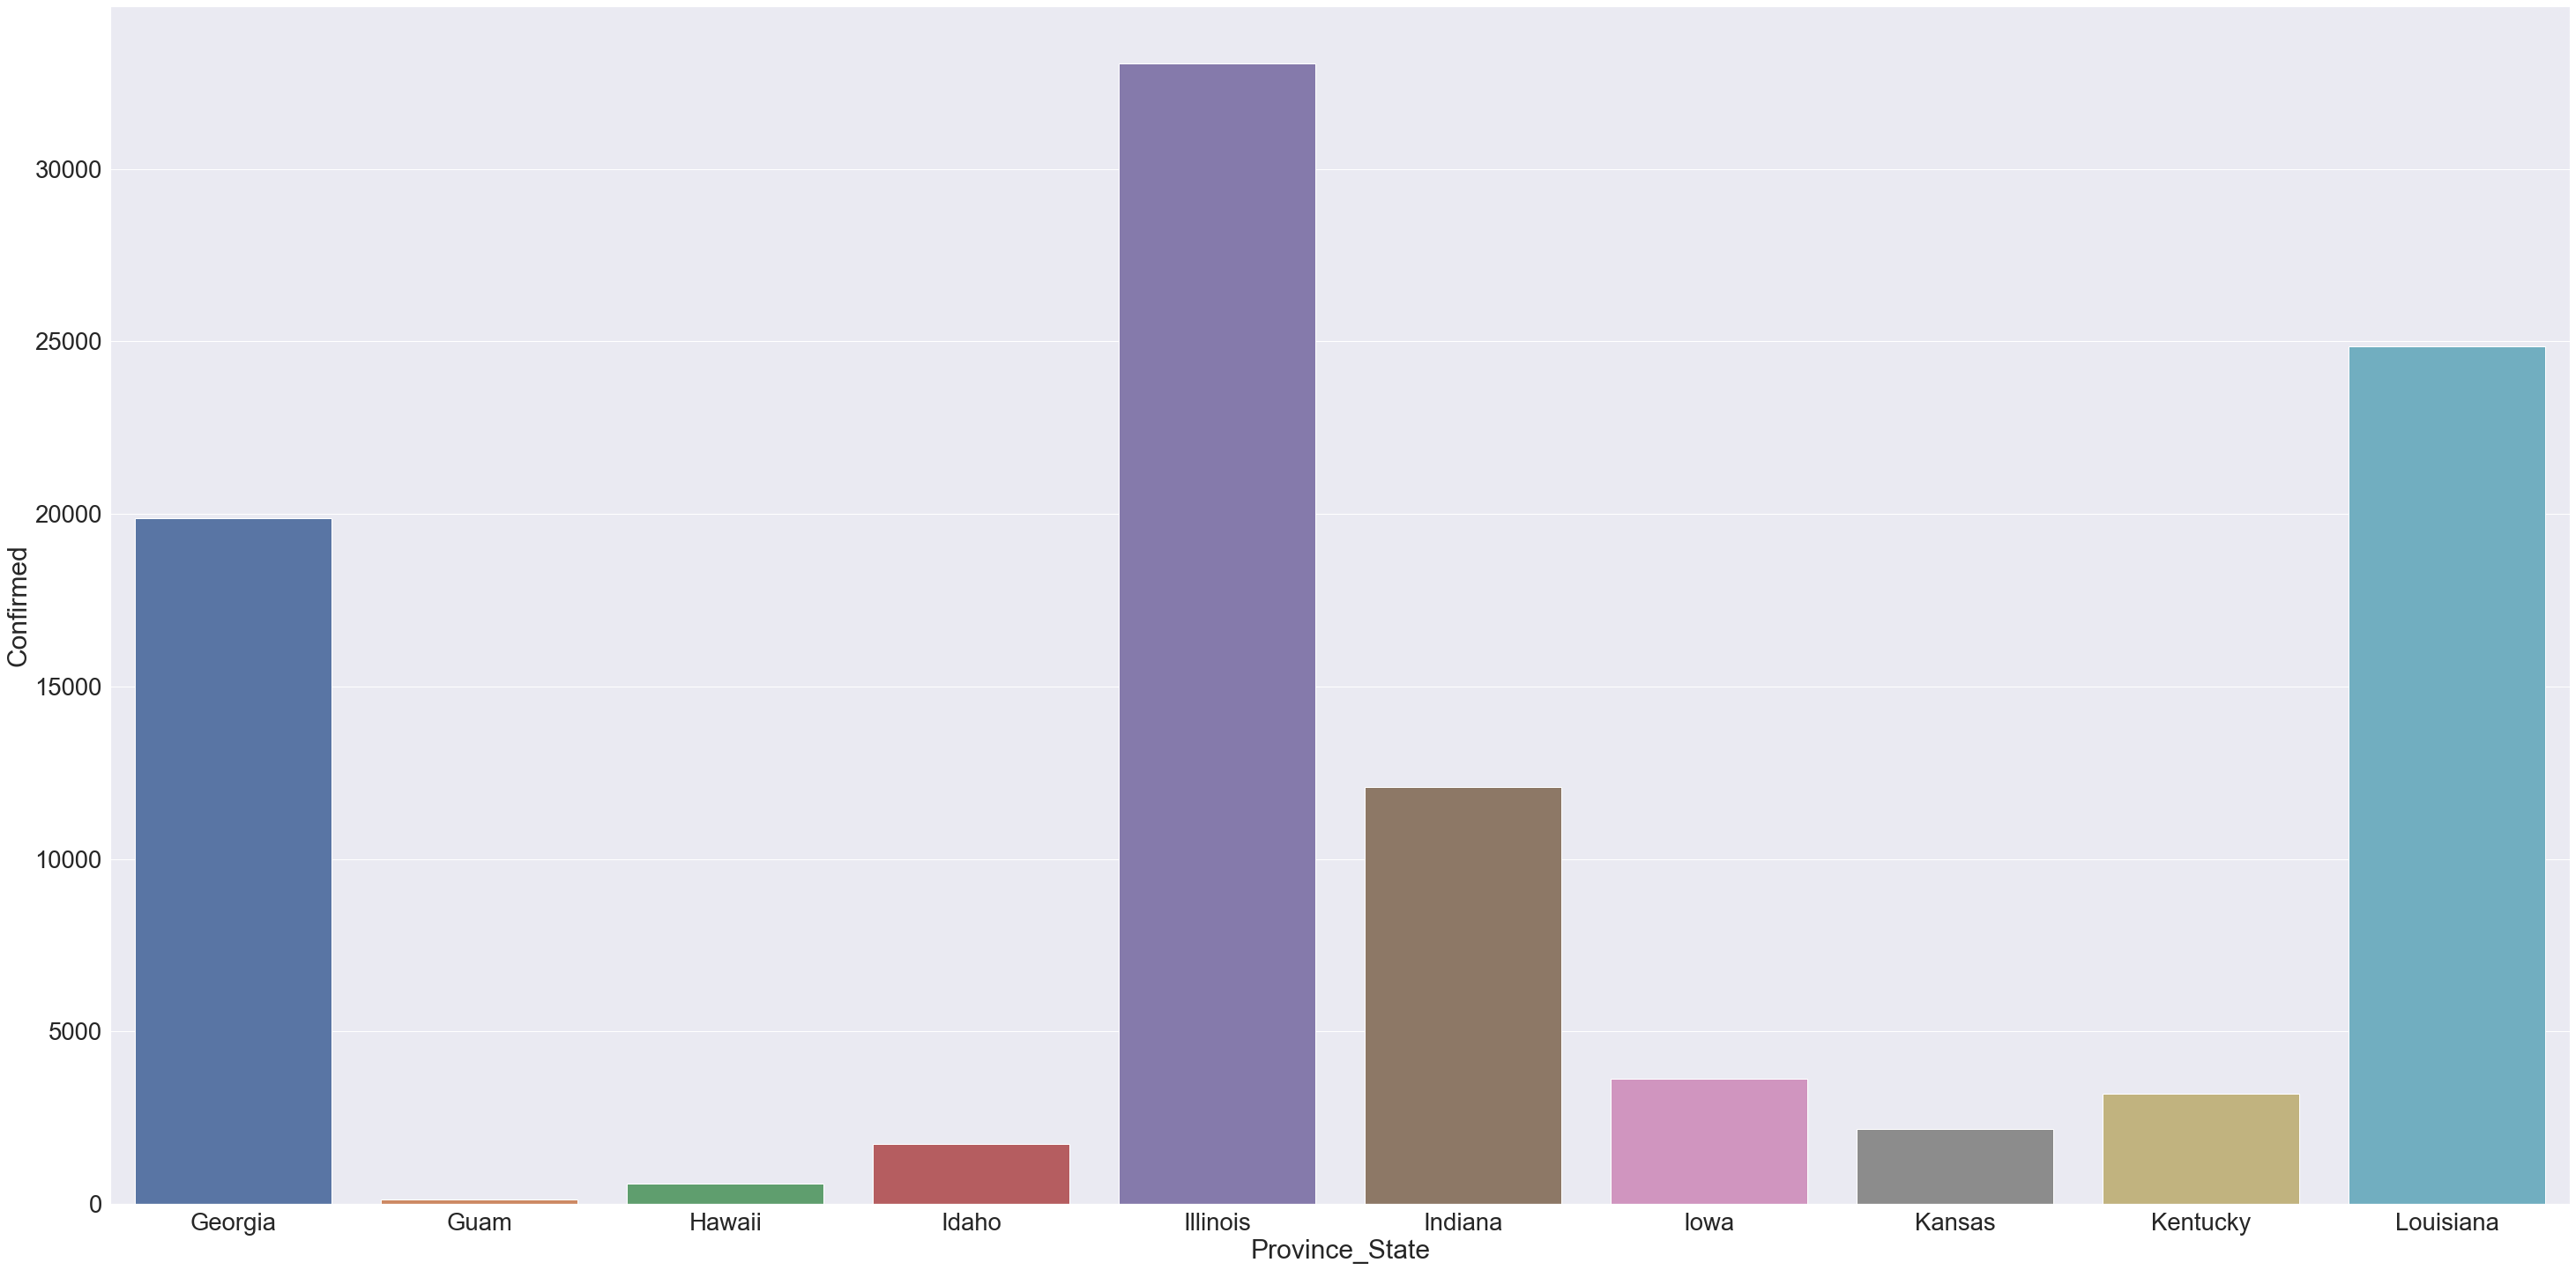

In [15]:
sns.barplot(x = df.index[10:20], y = df.loc["Georgia": "Louisiana", "Confirmed"])

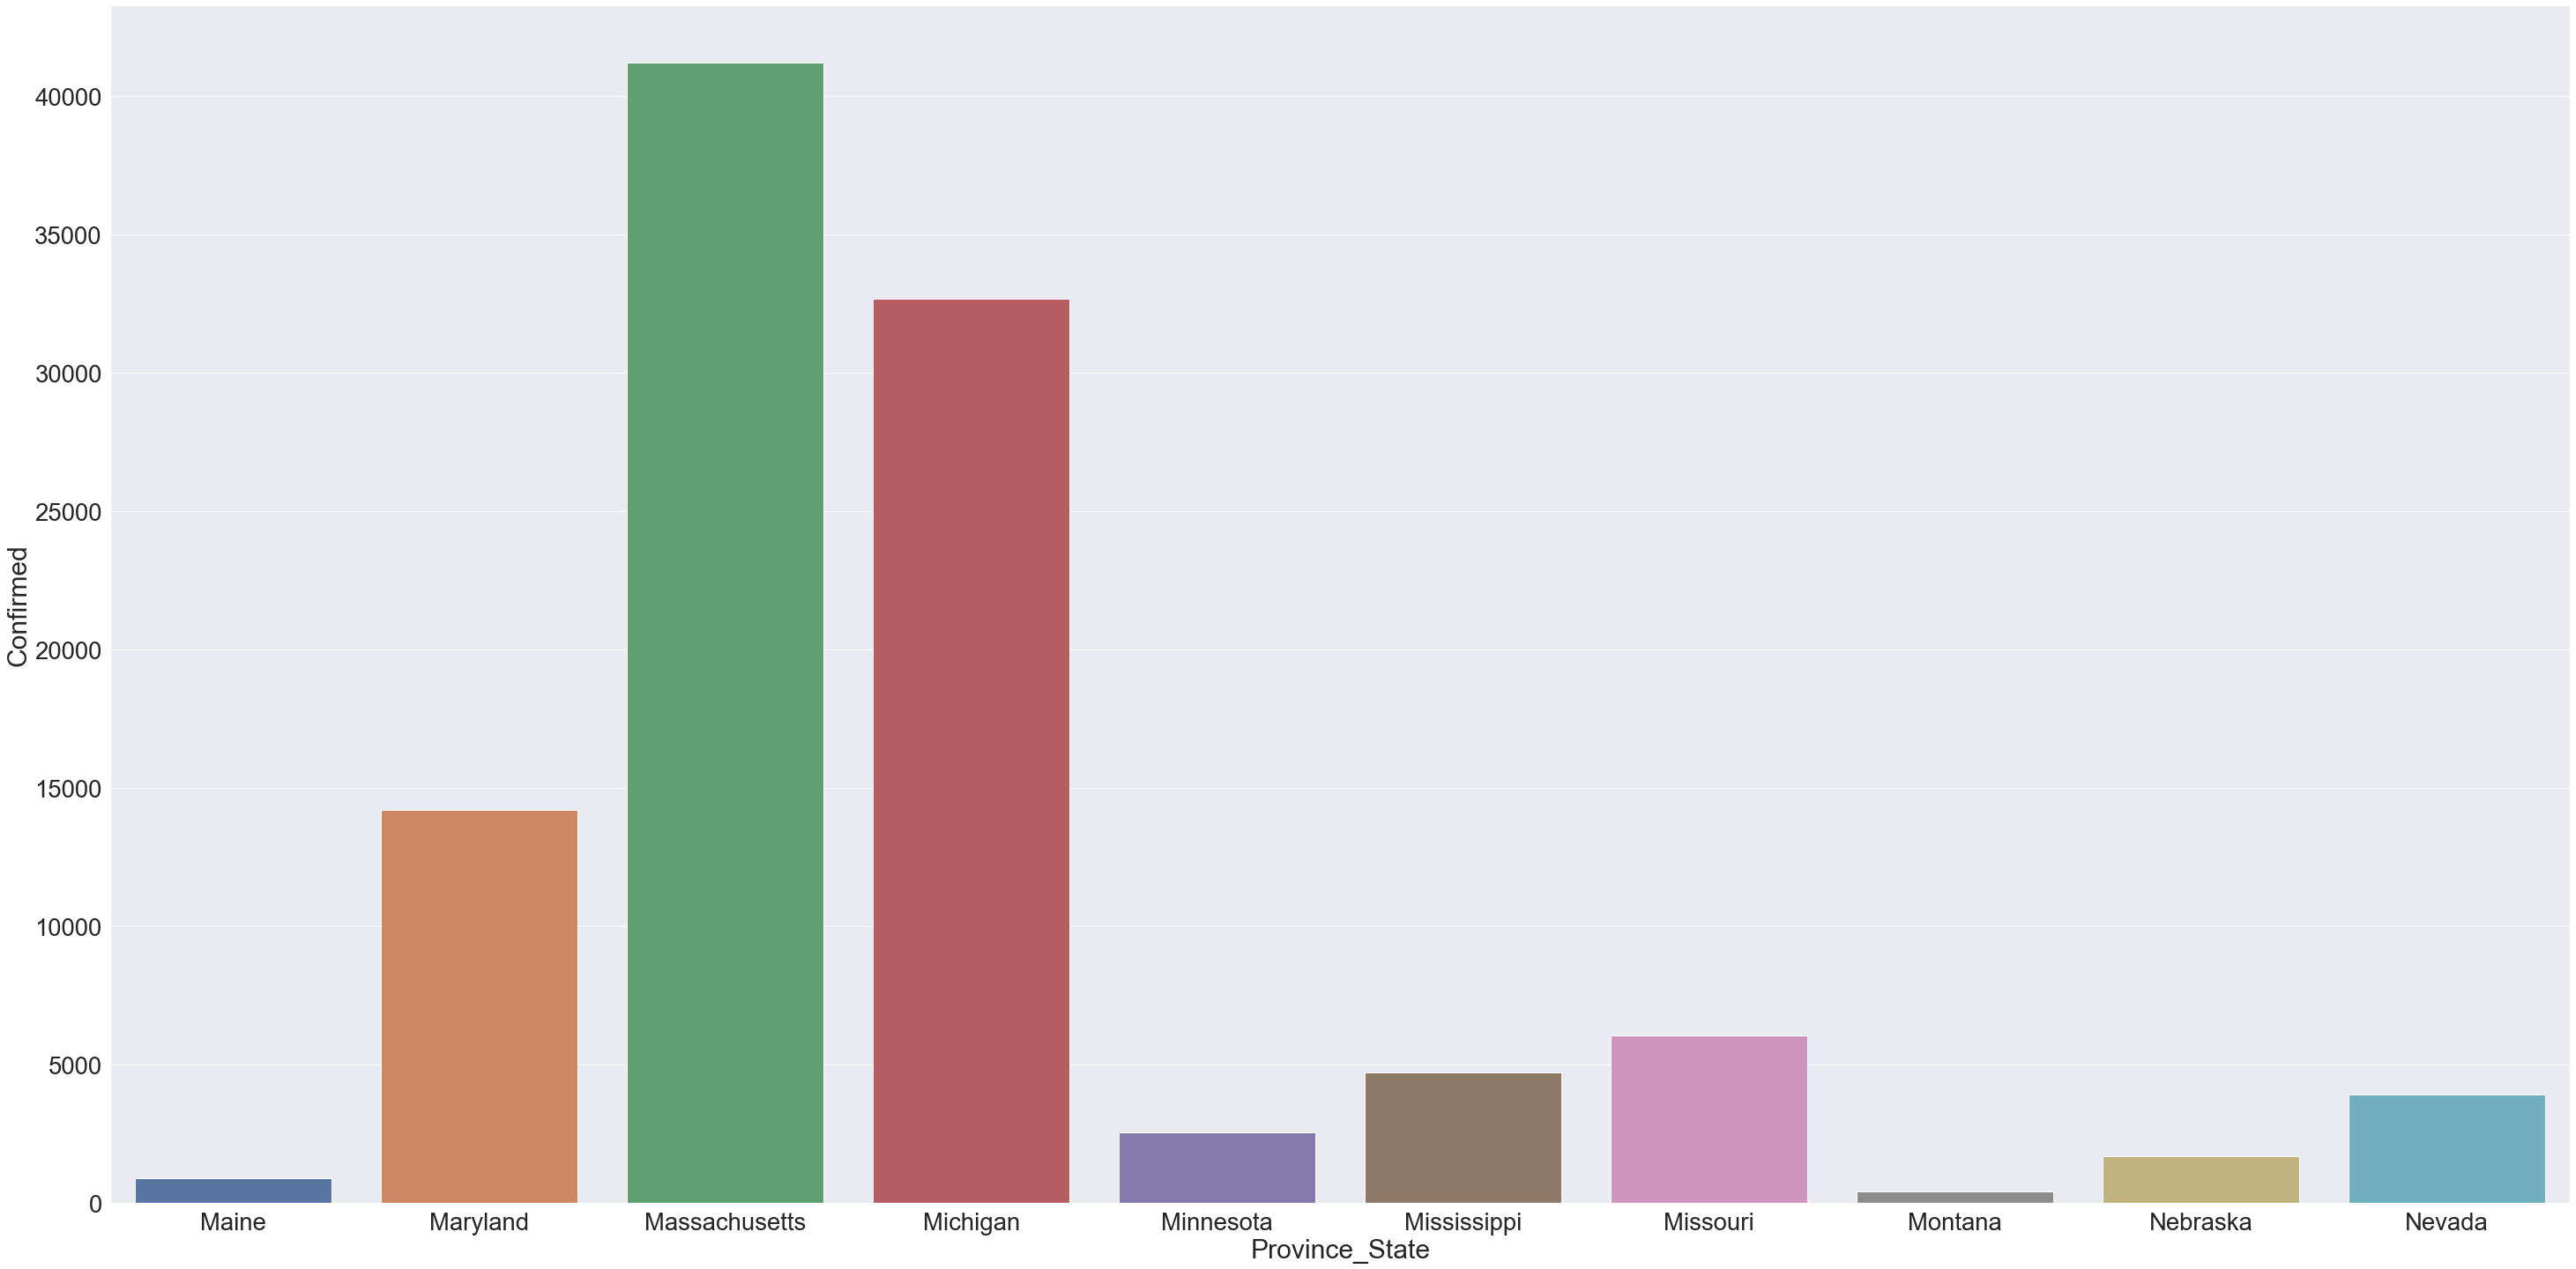

In [16]:
sns.barplot(x = df.index[20:30], y = df.loc["Maine": "Nevada", "Confirmed"])

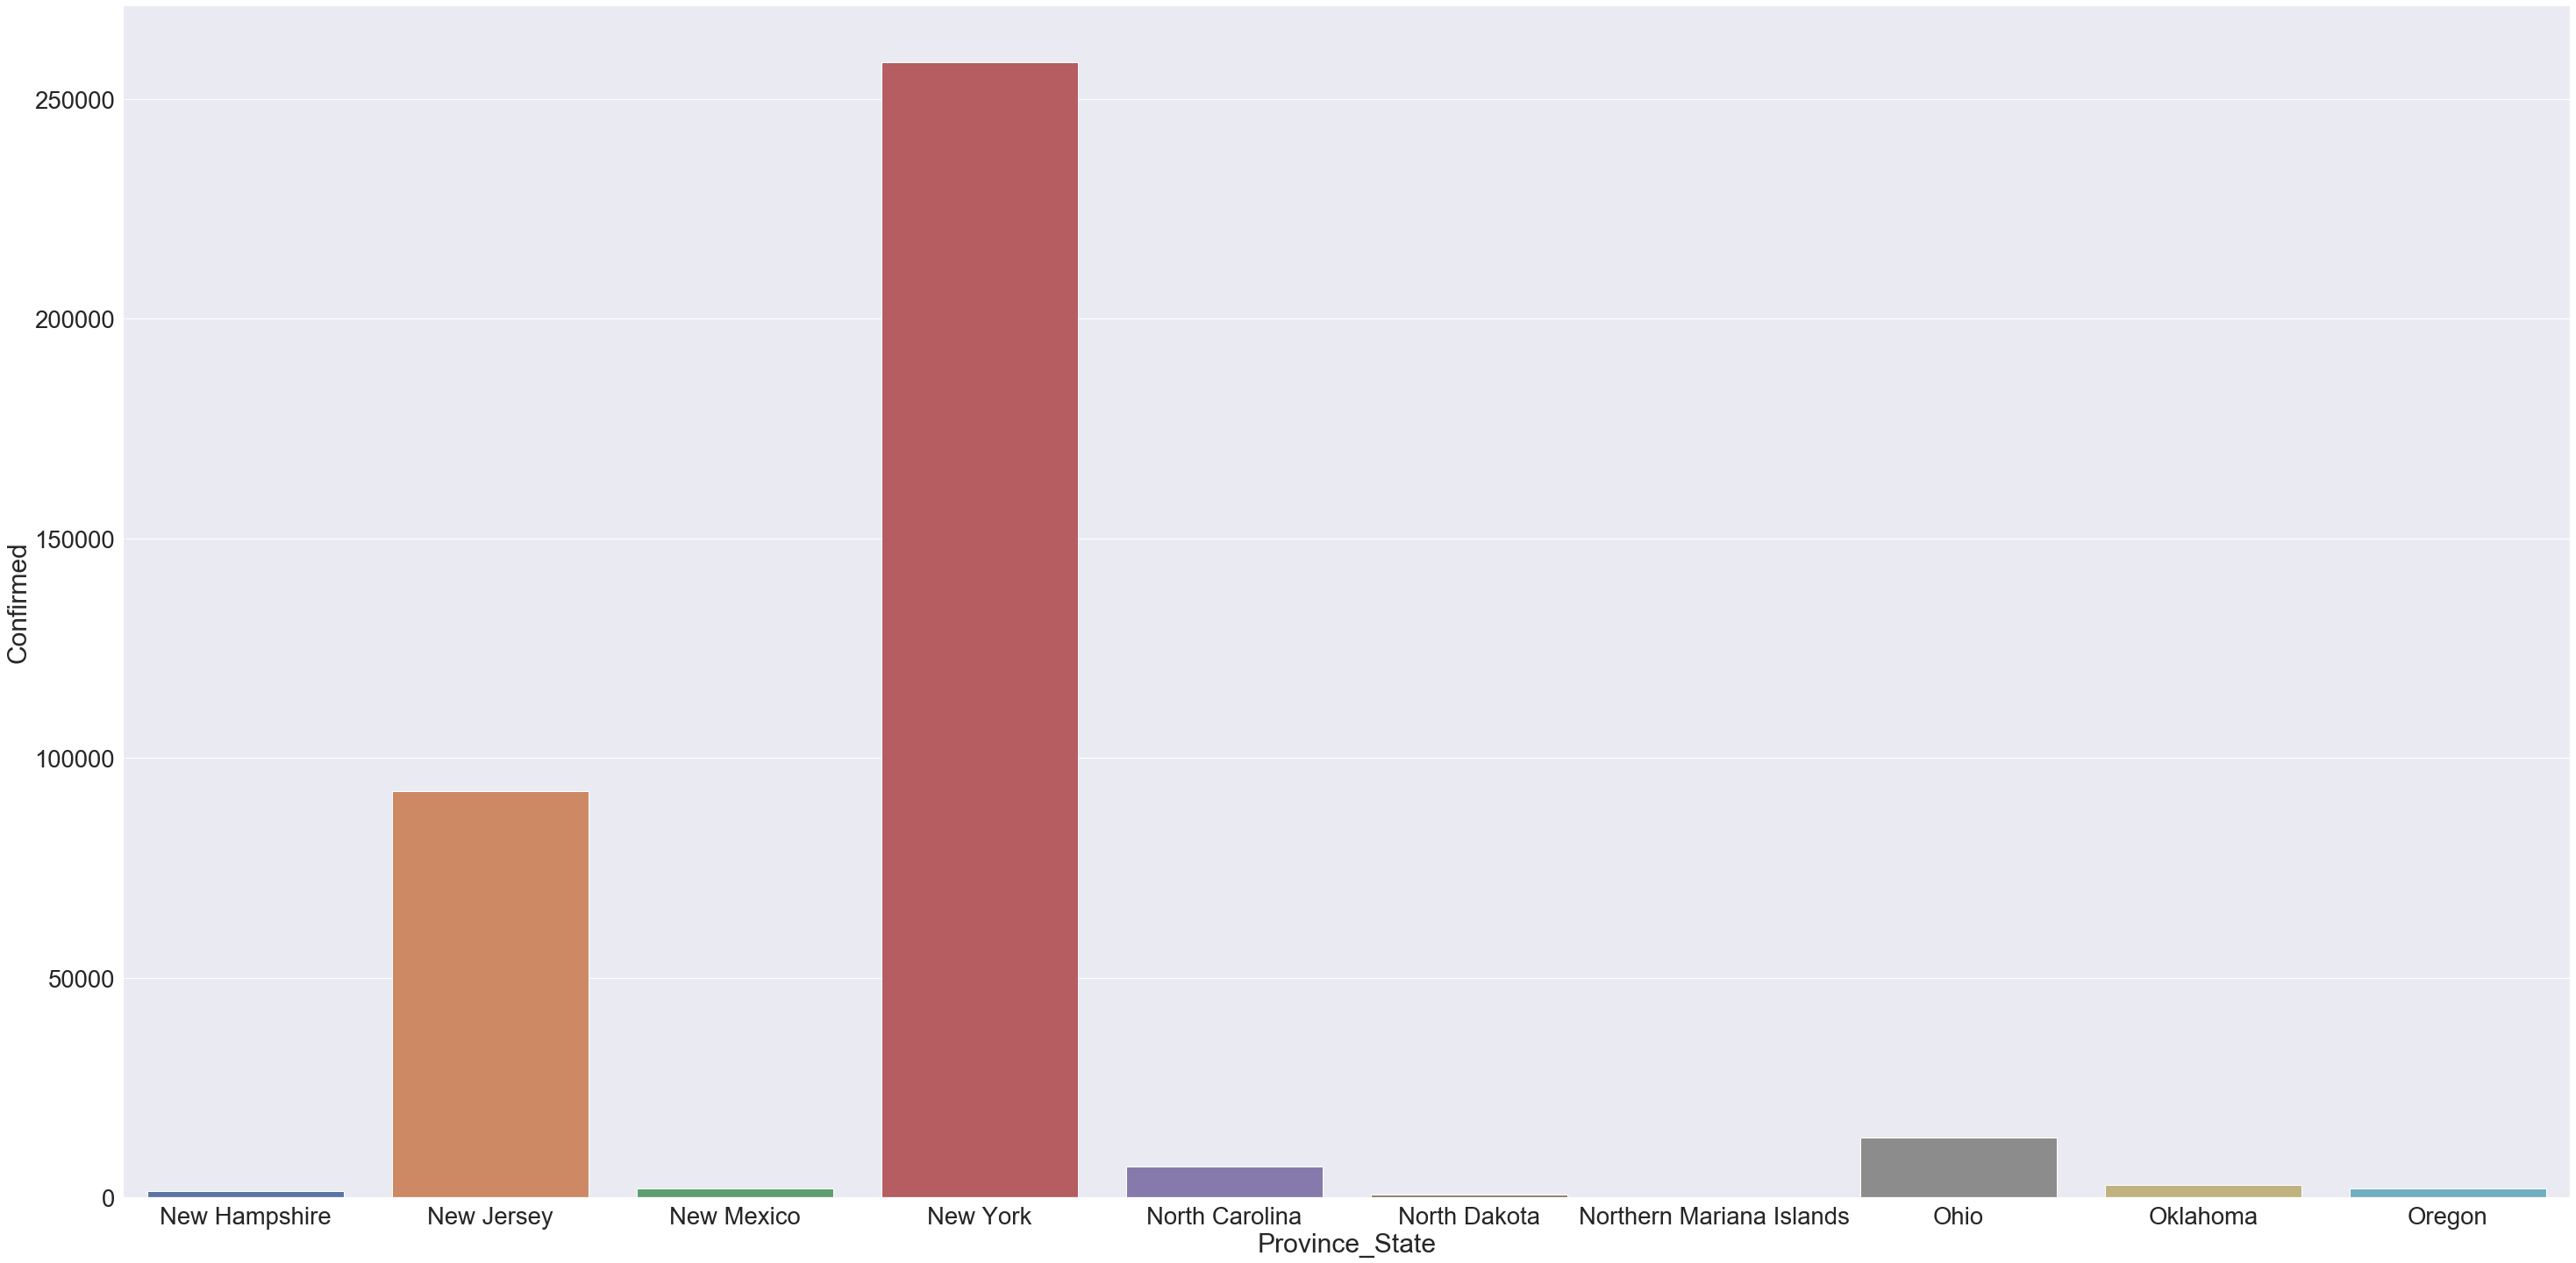

In [17]:
sns.barplot(x = df.index[30:40], y = df.loc["New Hampshire": "Oregon", "Confirmed"])

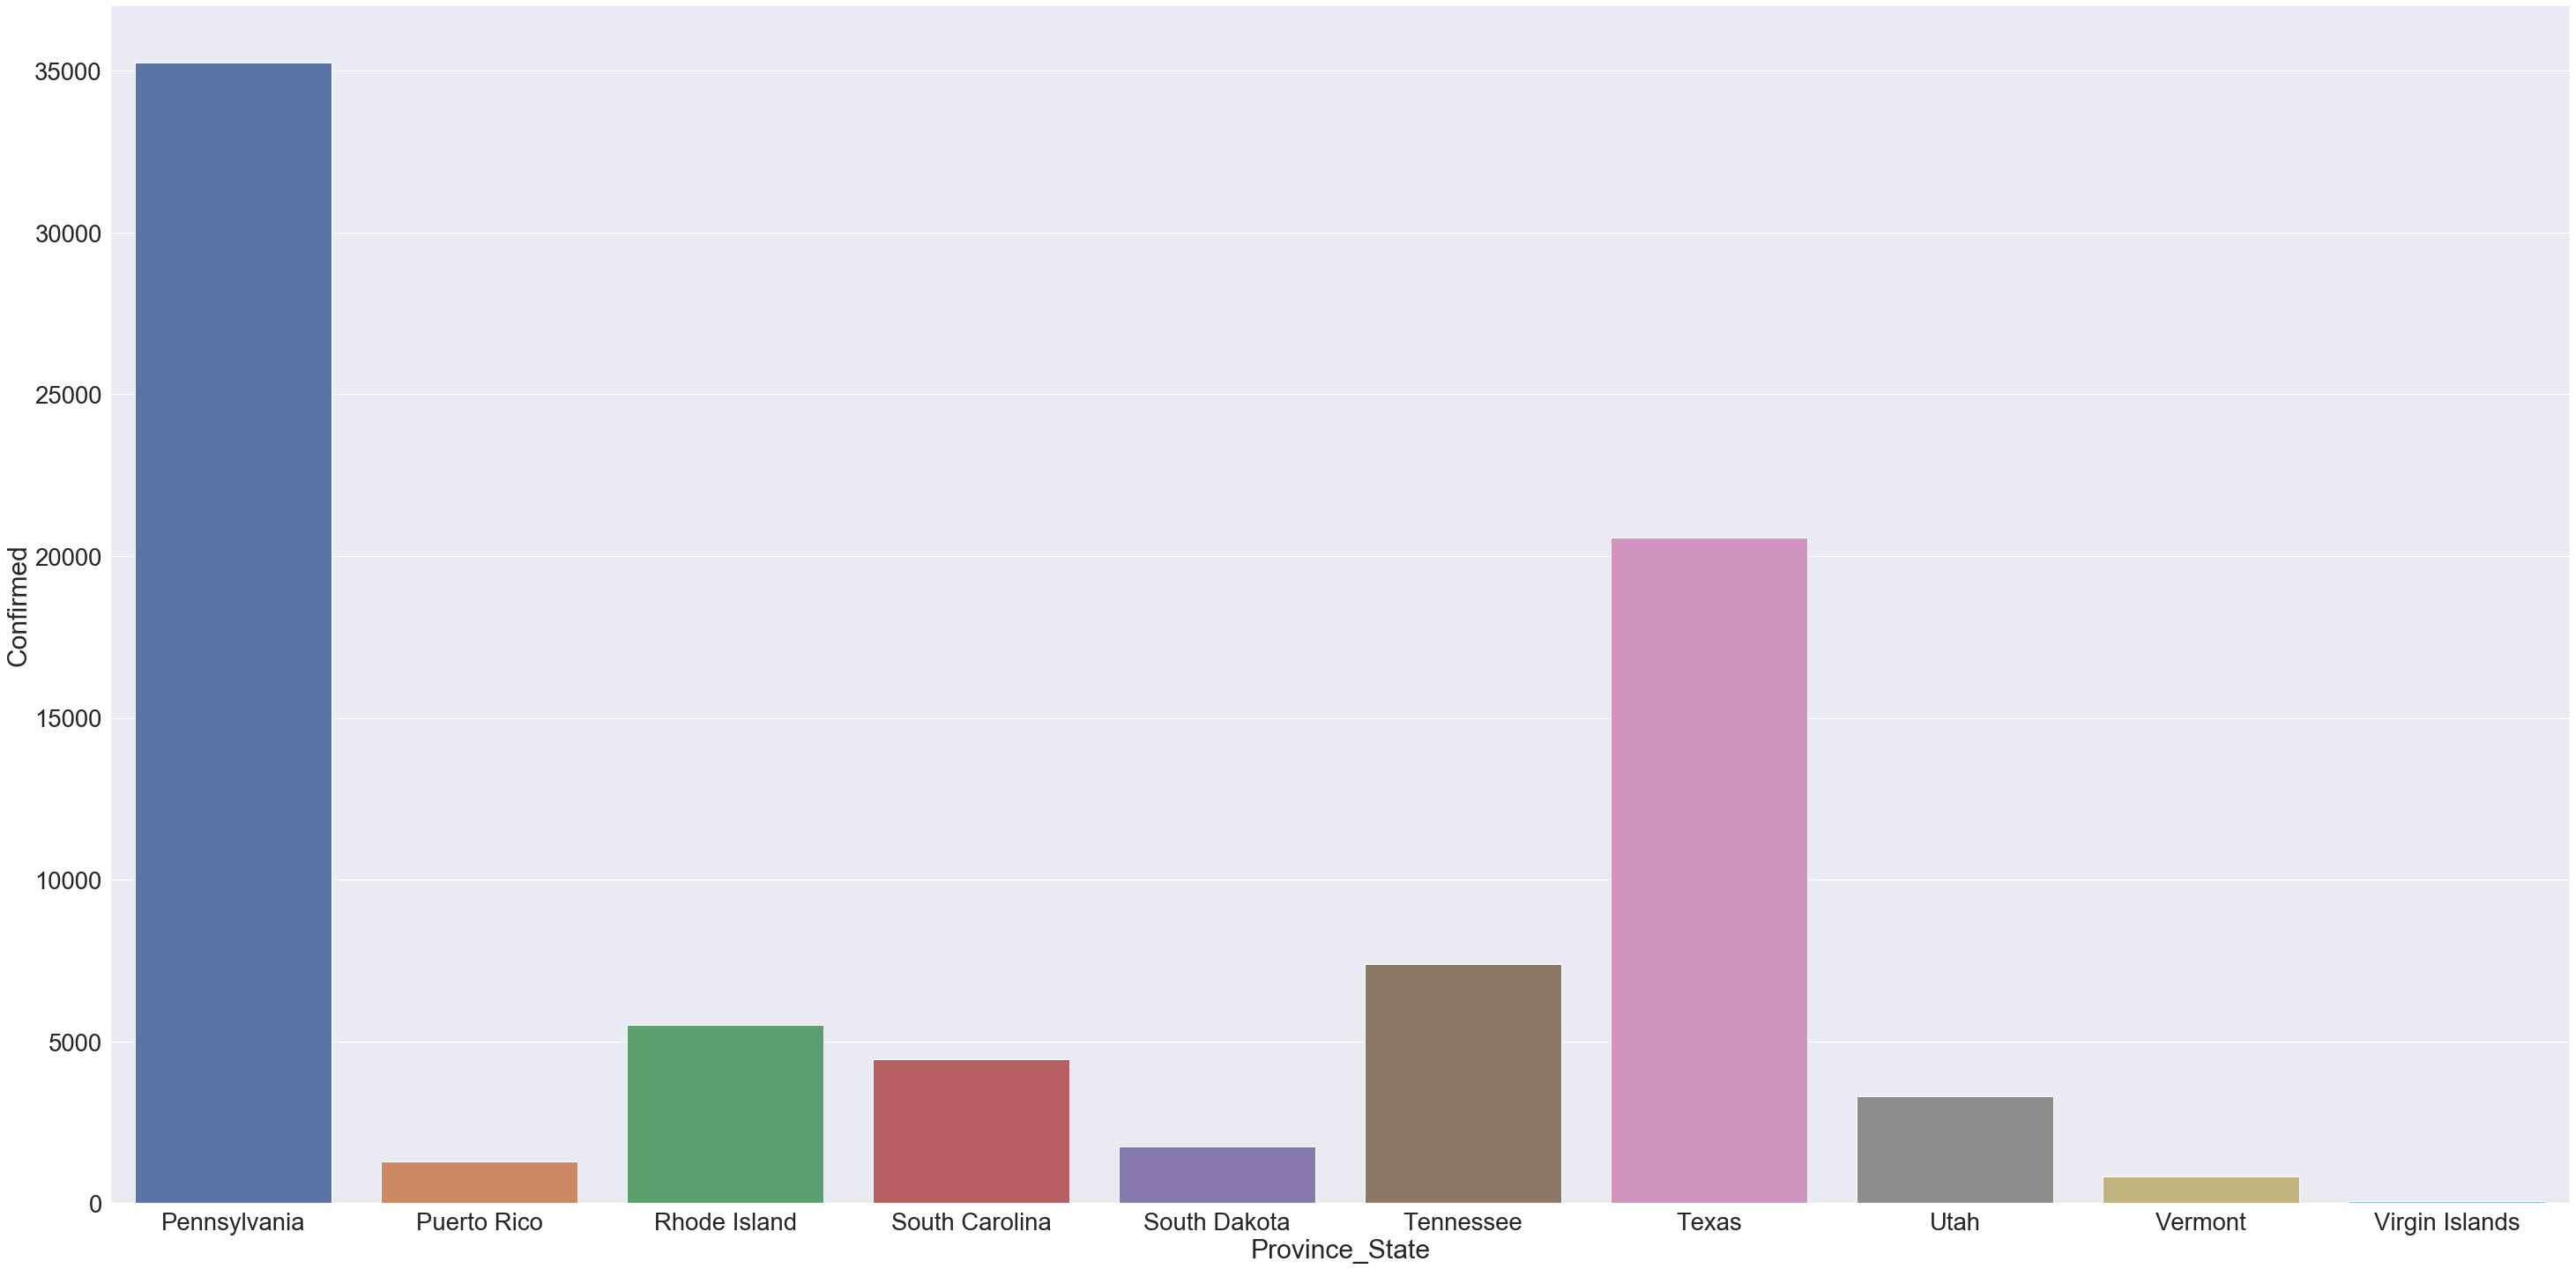

In [18]:
sns.barplot(x = df.index[40:50], y = df.loc["Pennsylvania": "Virgin Islands", "Confirmed"])

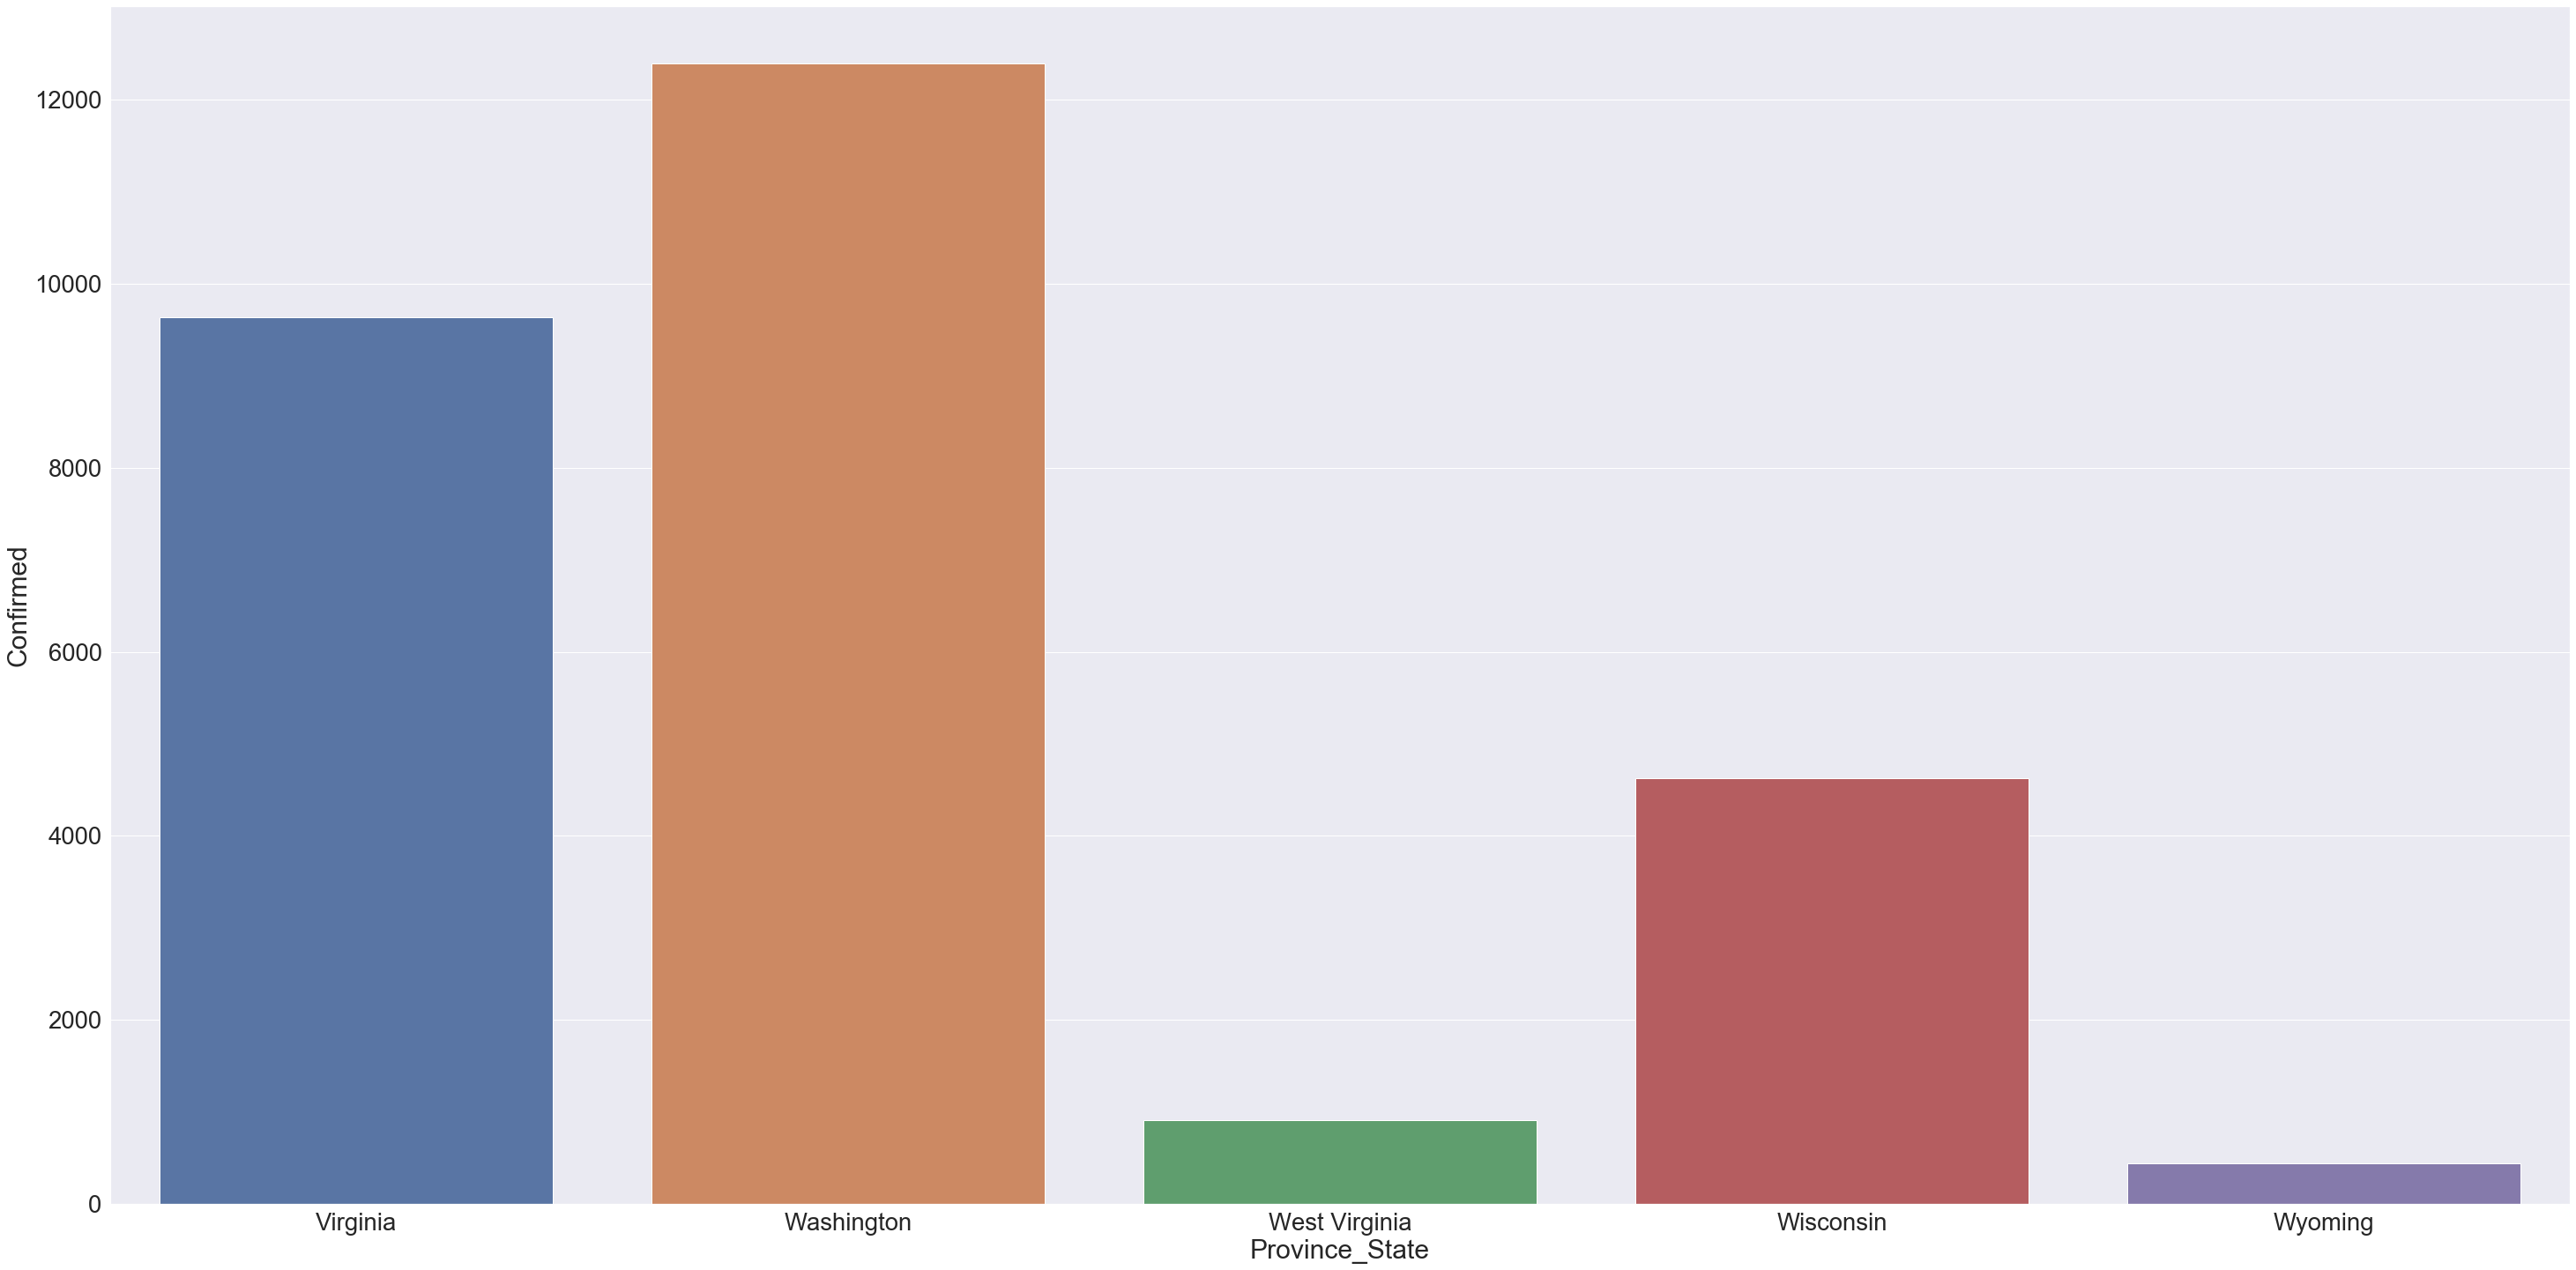

In [19]:
sns.barplot(x = df.index[50:56], y = df.loc["Virginia": "Wyoming", "Confirmed"])

In [40]:
sns.set(color_codes=True, font_scale = 1, rc={'figure.figsize':(25,20)})

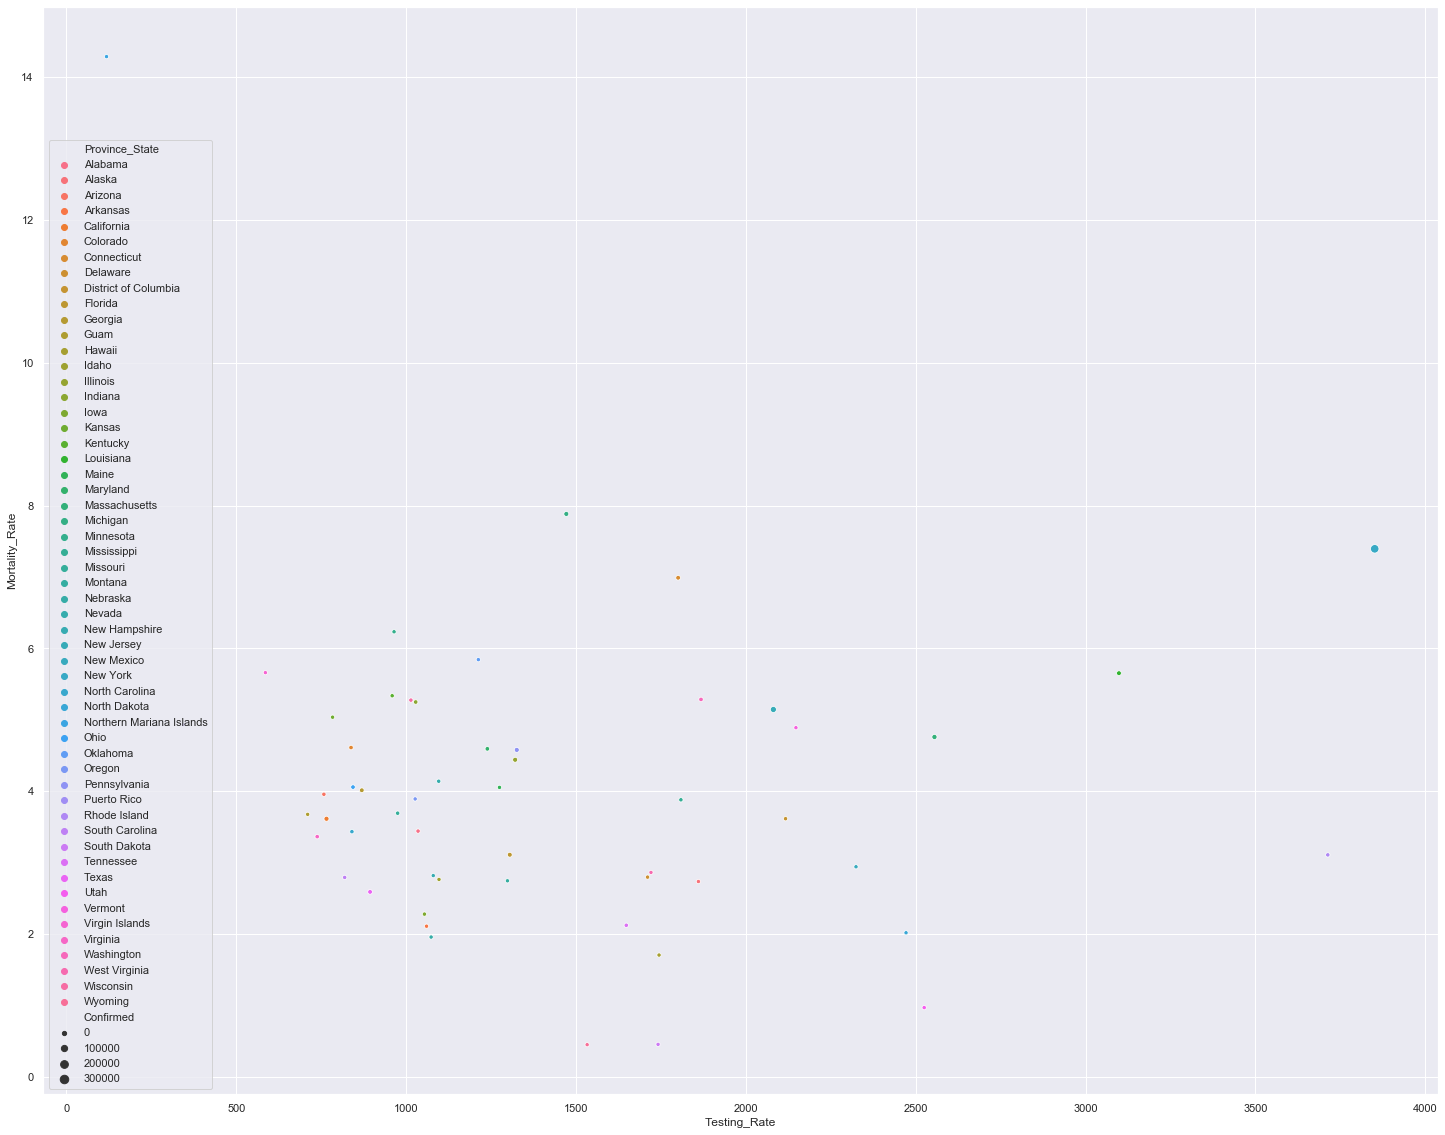

In [41]:
sns.scatterplot(x="Testing_Rate", y="Mortality_Rate", size = "Confirmed", hue = df.index, data = df)

In [42]:
#sort states based on confirmed cases in descending order
#most interested in the more effected areas, pick top 10 first 
df_srt = df.sort_values(by ='Confirmed', ascending = False)
df_srt = df_srt.iloc[0:10, :]
top_10 = ['New York','New Jersey','Massachusetts','California','Pennsylvania','Illinois','Michigan','Florida','Louisiana','Texas']

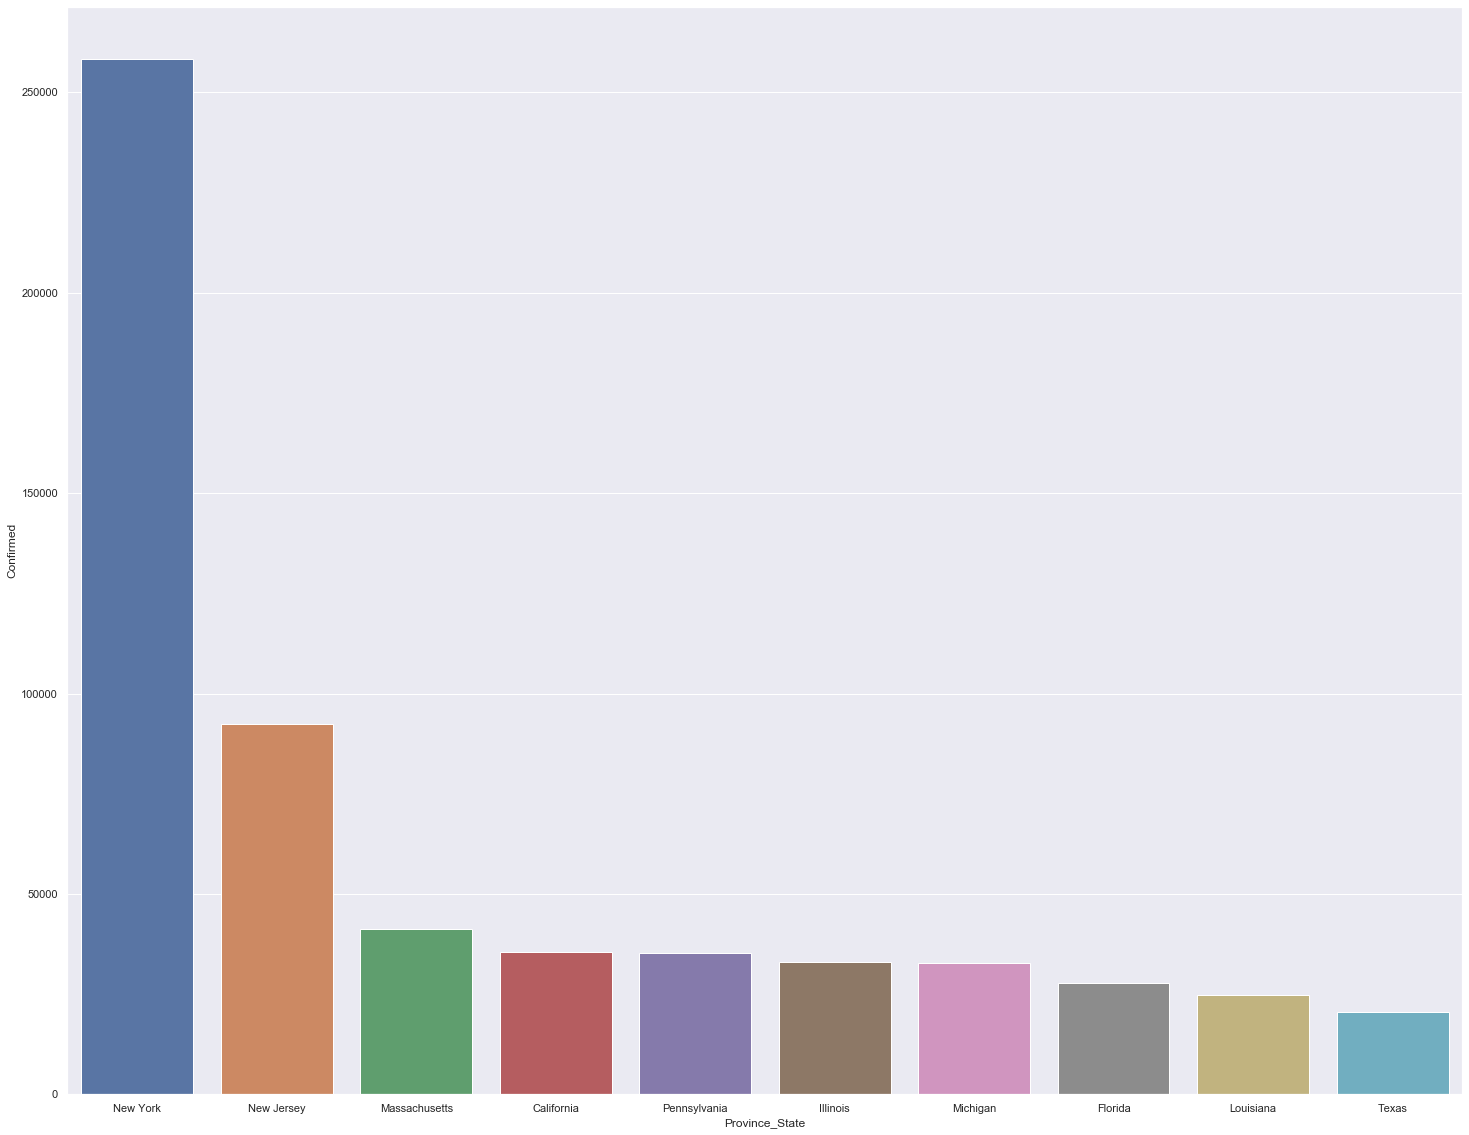

In [43]:
sns.barplot(x = df_srt.index, y = "Confirmed", data = df_srt)

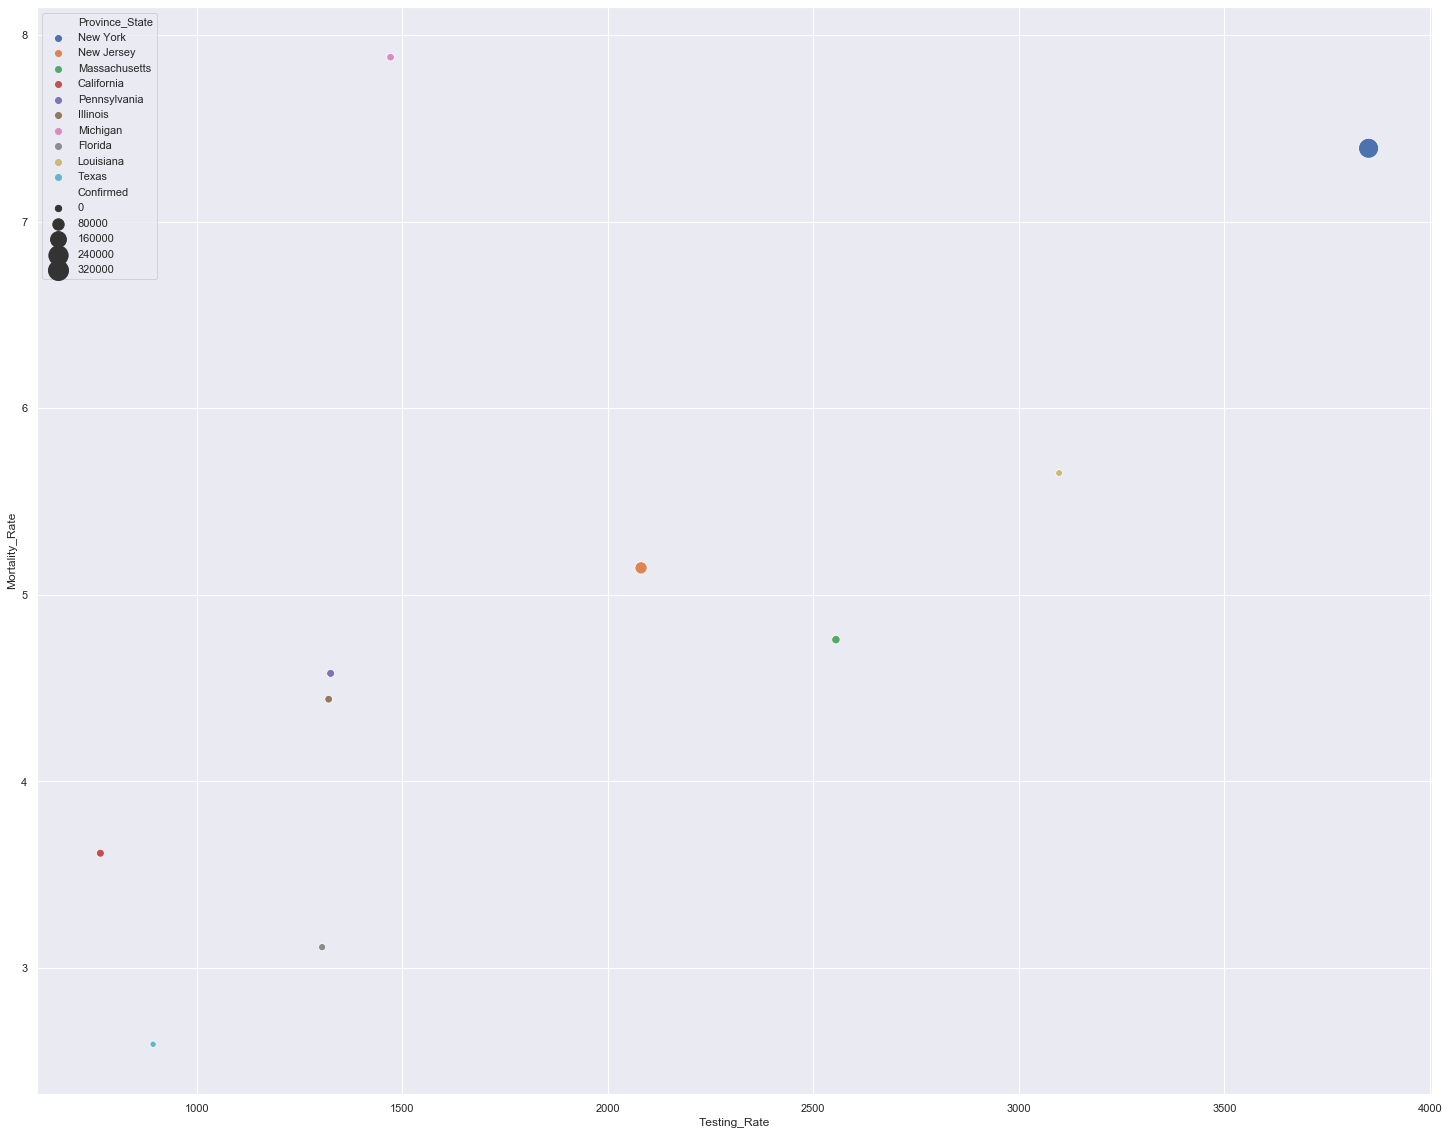

In [44]:
sns.scatterplot(x="Testing_Rate", y="Mortality_Rate", size="Confirmed", hue = df_srt.index, sizes=(40, 400), data = df_srt)
#new york: high testing, high mortality rate and most confirmed cases 
#surprising: Michigan has low testing rate and high mortality rate 

# Exploration of Time Series Data

In [88]:
df_time = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
df_time.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,136,136,136,136,136,139,141,141,141,141
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,14,14,14,14,14,14,14,14,14,14
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,53,53,53,53,54,54,54,55,57,57


In [89]:
df_time.set_index("Province_State", inplace = True)

In [90]:
df_time

,UID,iso2,iso3,code3,FIPS,Admin2,Country_Region,Lat,Long_,Combined_Key,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
Province_State,,,,,,,,,,,,,,,,,,,,,
American Samoa,16.0,AS,ASM,16,60.0,NaN,US,-14.271000,-170.132000,"American Samoa, US",...,0,0,0,0,0,0,0,0,0,0
Guam,316.0,GU,GUM,316,66.0,NaN,US,13.444300,144.793700,"Guam, US",...,136,136,136,136,136,139,141,141,141,141
Northern Mariana Islands,580.0,MP,MNP,580,69.0,NaN,US,15.097900,145.673900,"Northern Mariana Islands, US",...,14,14,14,14,14,14,14,14,14,14
Puerto Rico,630.0,PR,PRI,630,72.0,NaN,US,18.220800,-66.590100,"Puerto Rico, US",...,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389
Virgin Islands,850.0,VI,VIR,850,78.0,NaN,US,18.335800,-64.896300,"Virgin Islands, US",...,53,53,53,53,54,54,54,55,57,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Utah,84070017.0,US,USA,840,NaN,Southeast Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",...,0,6,7,7,7,7,8,11,12,13
Utah,84070018.0,US,USA,840,NaN,Southwest Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",...,0,66,70,70,70,76,81,83,87,89
Utah,84070019.0,US,USA,840,NaN,TriCounty,US,40.124915,-109.517442,"TriCounty, Utah, US",...,0,10,10,10,9,9,9,9,10,11


In [91]:
df_time.drop(["UID", "iso2", "iso3", "code3", "FIPS", "Admin2", "Lat", "Long_"], axis = 1, inplace = True)
df_time.drop(["American Samoa", "Diamond Princess", "Grand Princess"], axis = 0, inplace = True)

In [92]:
df_time

,Country_Region,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Guam,US,"Guam, US",0,0,0,0,0,0,0,0,...,136,136,136,136,136,139,141,141,141,141
Northern Mariana Islands,US,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,...,14,14,14,14,14,14,14,14,14,14
Puerto Rico,US,"Puerto Rico, US",0,0,0,0,0,0,0,0,...,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389
Virgin Islands,US,"Virgin Islands, US",0,0,0,0,0,0,0,0,...,53,53,53,53,54,54,54,55,57,57
Alabama,US,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,...,25,26,28,30,32,33,36,36,37,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Utah,US,"Southeast Utah, Utah, US",0,0,0,0,0,0,0,0,...,0,6,7,7,7,7,8,11,12,13
Utah,US,"Southwest Utah, Utah, US",0,0,0,0,0,0,0,0,...,0,66,70,70,70,76,81,83,87,89
Utah,US,"TriCounty, Utah, US",0,0,0,0,0,0,0,0,...,0,10,10,10,9,9,9,9,10,11


In [260]:
#creating a new dataframe to hold time series data for the top 10 most effected states 
df_timeC = pd.DataFrame()

In [261]:
for states in df_time.index:
    for top10 in top_10:
        if states == top10:
            #print(df_time.loc[states, ])
            df_timeC[states] = df_time.loc[states, ].sum(axis = 0)
            
df_timeC

,California,Florida,Illinois,Louisiana,Massachusetts,Michigan,New Jersey,New York,Pennsylvania,Texas
Country_Region,USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...,USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...,USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...,USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...,USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS,USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...,USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS,USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...,USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...,USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Combined_Key,"Alameda, California, USAlpine, California, USA...","Alachua, Florida, USBaker, Florida, USBay, Flo...","Adams, Illinois, USAlexander, Illinois, USBond...","Acadia, Louisiana, USAllen, Louisiana, USAscen...","Barnstable, Massachusetts, USBerkshire, Massac...","Alcona, Michigan, USAlger, Michigan, USAllegan...","Atlantic, New Jersey, USBergen, New Jersey, US...","Albany, New York, USAllegany, New York, USBron...","Adams, Pennsylvania, USAllegheny, Pennsylvania...","Anderson, Texas, USAndrews, Texas, USAngelina,..."
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4/23/20,39561,29648,36937,25739,46023,35296,100025,263460,38379,22650
4/24/20,41355,30533,39658,26140,50969,36666,102196,271590,40208,23642
4/25/20,42368,30839,41777,26512,53348,37074,105498,282143,41153,24153
4/26/20,43558,31532,43903,26773,54938,37778,109038,288045,42616,24967


In [262]:
df_timeC.drop(["Country_Region", "Combined_Key"], axis = 0, inplace = True)
df_timeC.index.name = "Date"
#df_timeC.reset_index(level=0, inplace=True)
df_timeC

,California,Florida,Illinois,Louisiana,Massachusetts,Michigan,New Jersey,New York,Pennsylvania,Texas
Date,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,1,0,0,0,0,0,0,0
1/25/20,0,0,1,0,0,0,0,0,0,0
1/26/20,2,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4/23/20,39561,29648,36937,25739,46023,35296,100025,263460,38379,22650
4/24/20,41355,30533,39658,26140,50969,36666,102196,271590,40208,23642
4/25/20,42368,30839,41777,26512,53348,37074,105498,282143,41153,24153


In [268]:
#date that WHO declared COVID as a pandemic: 3/11
#df_timeC[df_timeC.loc[:, "Date"] == "3/11/20"]  #getting the index number
#df_timeC = df_timeC.iloc[49: , :]

#treating date as index name
df_timeC = df_timeC.loc["3/11/20": , :] 

Visualizations of time series data 

In [236]:
sns.set(color_codes=True, font_scale = 1.25, rc={'figure.figsize':(30,20)})

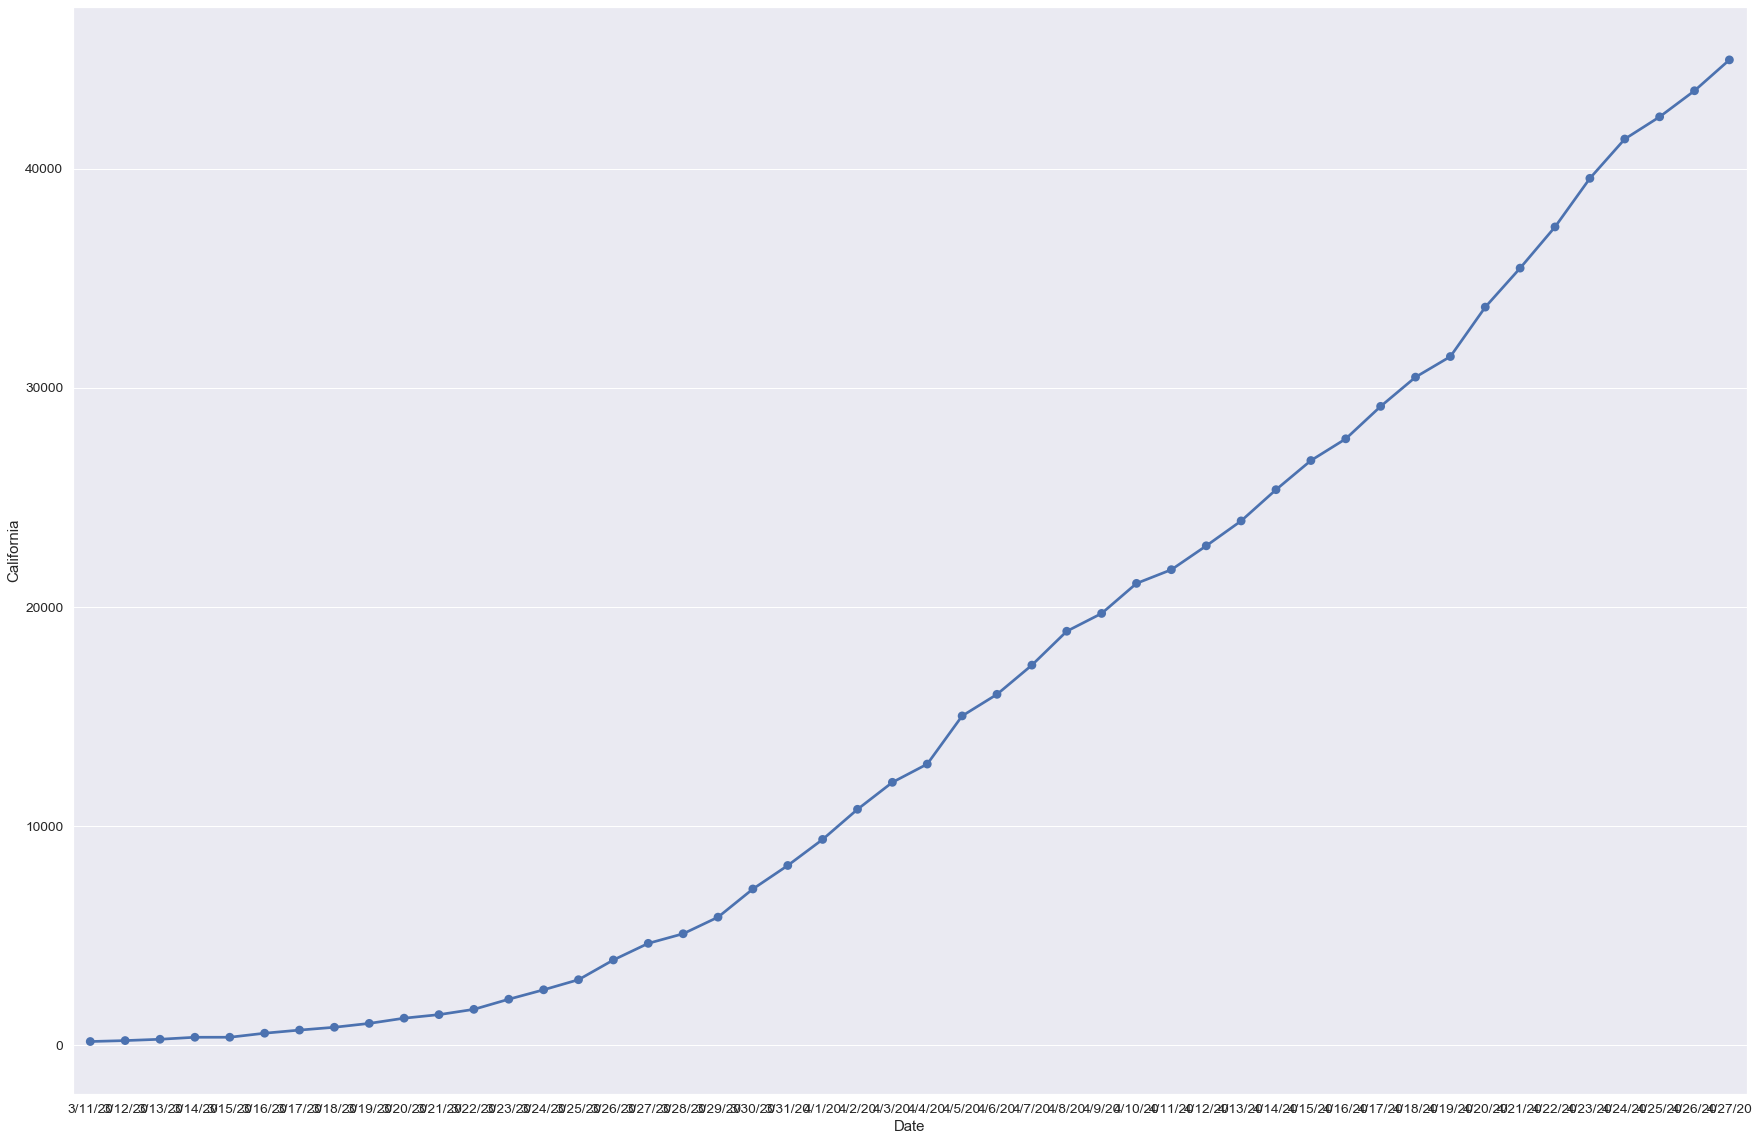

In [283]:
#sns.lineplot(x = "Date", y = df_timeC.California.astype(float), data = df_timeC)
sns.pointplot(x = df_timeC.index, y = df_timeC["California"], data = df_timeC)

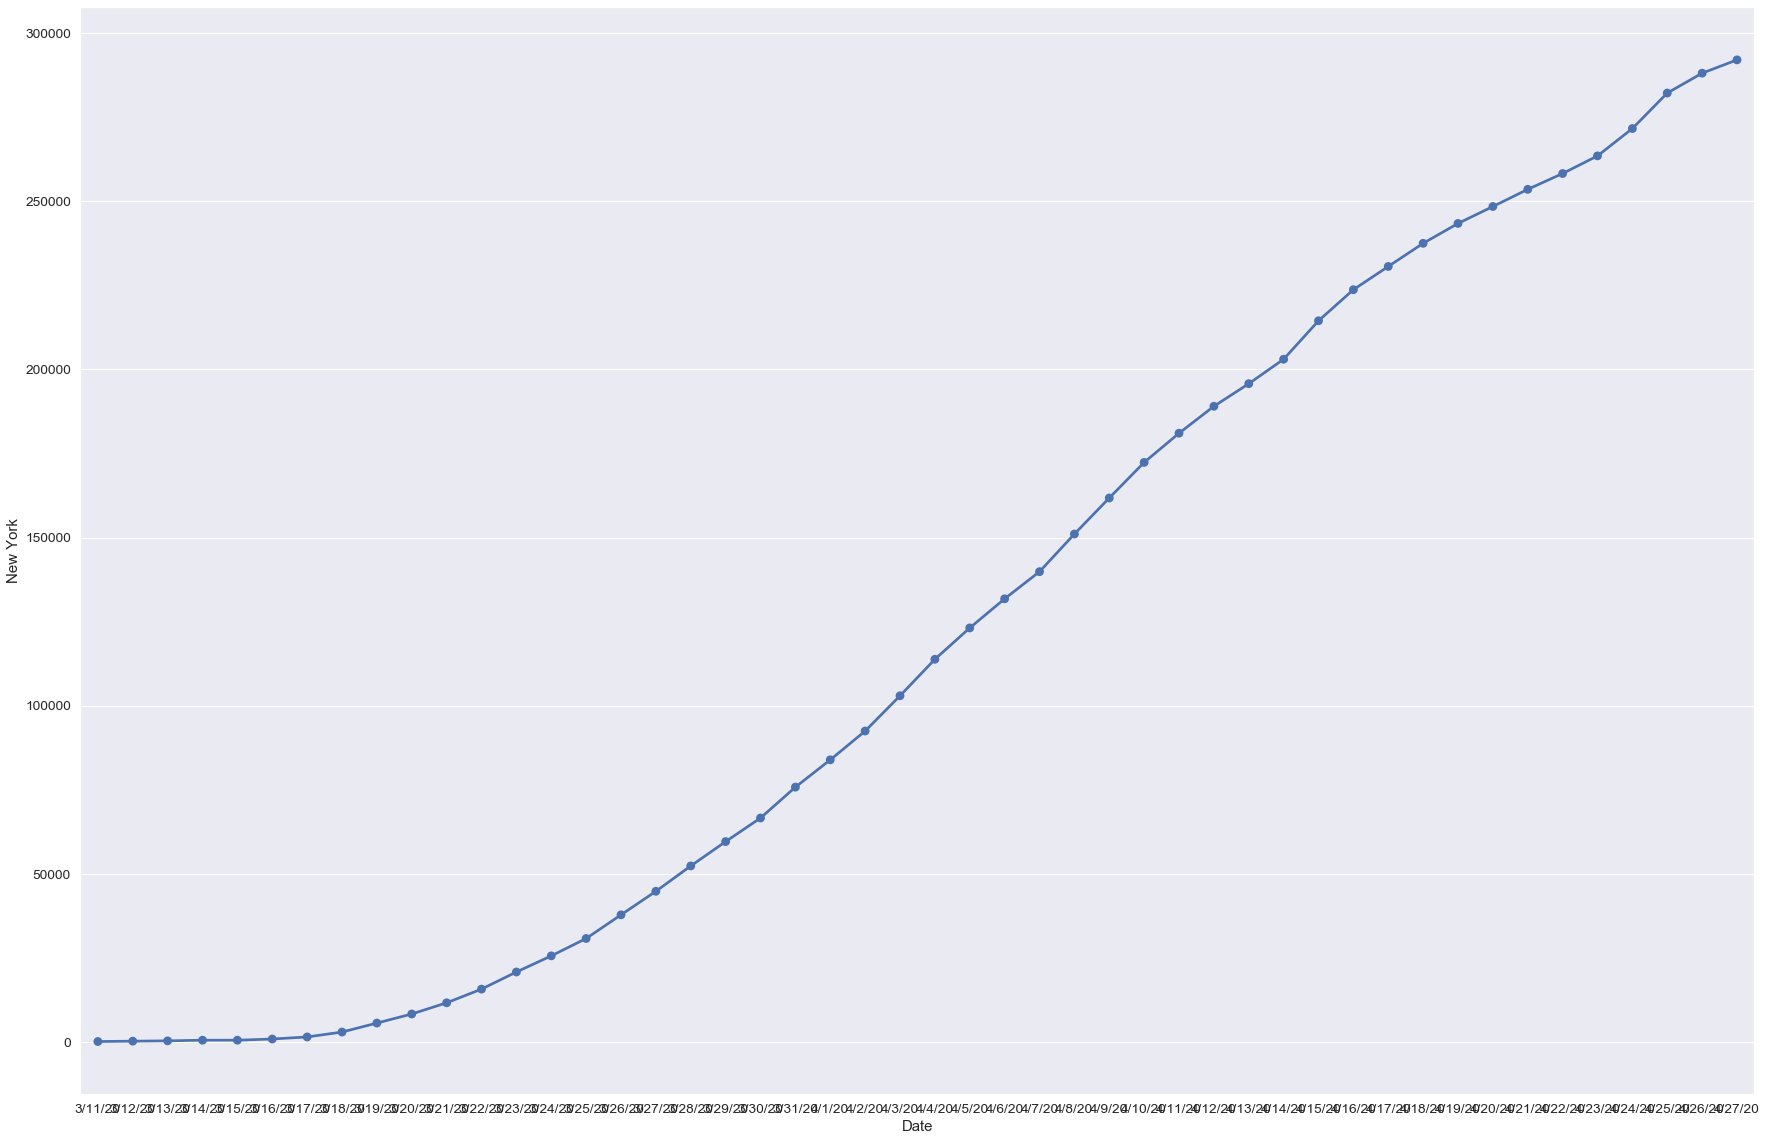

In [282]:
#sns.lineplot(x = "Date", y = df_timeC.loc[:, "New York"].astype(float), data = df_timeC)
sns.pointplot(x = df_timeC.index, y = df_timeC.loc[:, "New York"], data = df_timeC)

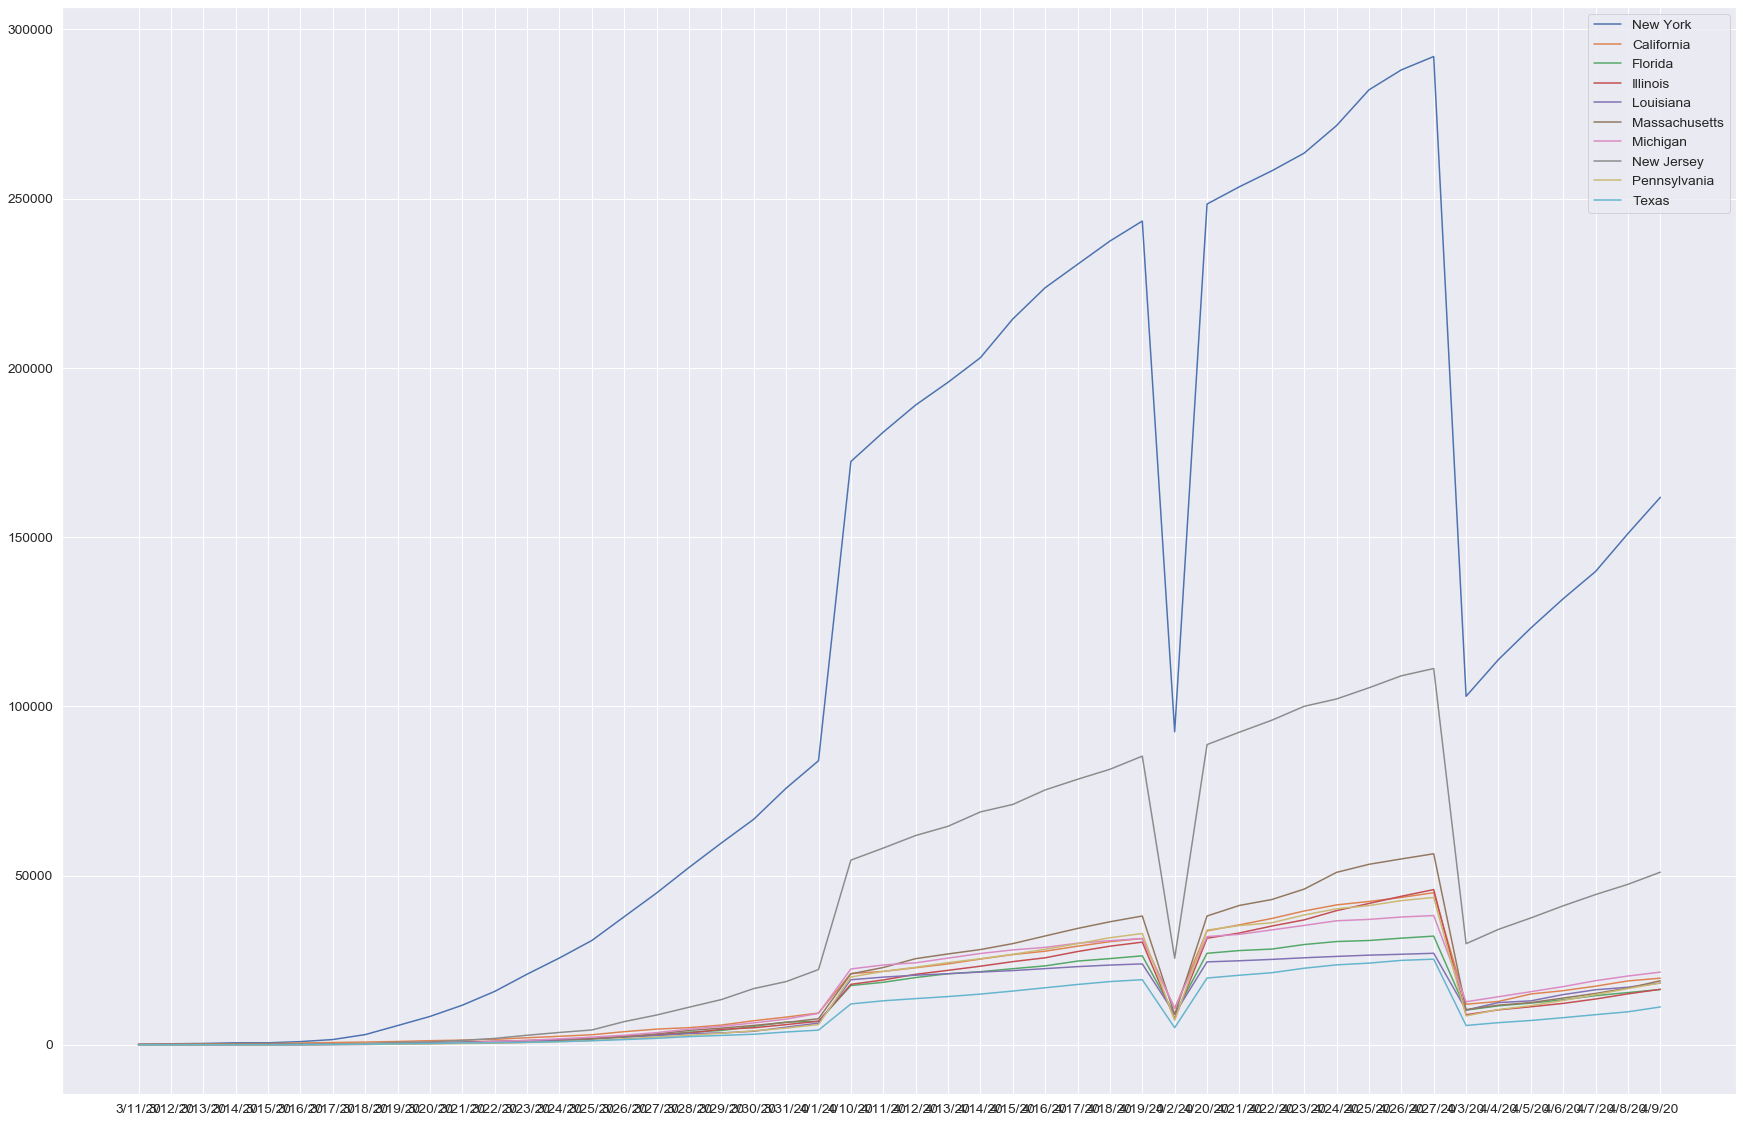

In [287]:
list_data = [df_timeC.loc[:, "New York"].astype(float), df_timeC.loc[:, "California"].astype(float), 
             df_timeC.loc[:, "Florida"].astype(float), df_timeC.loc[:, "Illinois"].astype(float), 
             df_timeC.loc[:, "Louisiana"].astype(float), df_timeC.loc[:, "Massachusetts"].astype(float),
             df_timeC.loc[:, "Michigan"].astype(float), df_timeC.loc[:, "New Jersey"].astype(float), 
             df_timeC.loc[:, "Pennsylvania"].astype(float), df_timeC.loc[:, "Texas"].astype(float)]

#list_data
ax = sns.lineplot(data = list_data, dashes=False)
#weird